**Lab2-DL: B1-nn-intro.ipynb** (ELMED219) | Prioritet: 1 (kjerne)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/B1-nn-intro.ipynb)

# 🧠 B1: Nevrale Nettverk i Menneske og Maskin



**Fra Hjernen til Maskinen: En Medisinsk Introduksjon til Nevrale Nettverk**

---

## 🎯 Mål for denne delen

I denne notebooken skal vi:
- **Forstå** hvordan hjernen fungerer som et nevralt nettverk
- **Sammenlikne** biologiske- og kunstige nevroner
- **Utforske** grunnleggende arkitektur og komponenter
- **Se** hvordan nevrale nettverk brukes i medisin og helse
- **Bruke** Python-biblioteker (Matplotlib, Seaborn) for å illustrere hvoerdan man kan lage figurer programmatisk

## Teoretisk Fundament

### Hjernen som et Nevralt Nettverk

Menneskets hjerne består av omtrent **80 milliarder nevroner**, hver med tusenvis av forbindelser. Dette skaper et komplekst, hierarkisk nettverk som kan:
- **Lære** fra erfaring
- **Generalisere** fra eksempler
- **Tilpasse seg** nye situasjoner
- **Huske** tidligere opplevelser

### Fra Biologi til Maskinlæring

| Aspekt | Biologisk Nevron | Kunstig Nevron |
|--------|------------------|----------------|
| **Input** | Synaptiske signaler | Numeriske verdier |
| **Prosessering** | Elektrokjemisk | Matematisk |
| **Output** | Aksjonspotensial | Aktiveringsfunksjon |
| **Læring** | Synaptisk plastisitet | Vektjustering |
| **Hastighet** | Millisekunder | Nanosekunder |


In [1]:
# Importer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
from matplotlib.patches import Circle, FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Sett opp plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


🧠 **Klar for nevral nettverk-eksplorering!**

In [2]:
print(f'PyTorch versjon: {torch.__version__}') 
print(f'CUDA tilgjengelig: {torch.cuda.is_available()}')
print(f'MPS tilgjengelig: {torch.backends.mps.is_available()}')

PyTorch versjon: 2.6.0
CUDA tilgjengelig: False
MPS tilgjengelig: True


## 💻 REGNEKRAFT FOR MEDISINSKE AI-SYSTEMER

### 🔬 Hvorfor trenger vi stor regnekraft i medisin?
- **EKG-analyse:** 1000+ datapunkter per sekund
- **MR-bilder:** Millioner av pikseler å analysere
- **DNA-sekvensering:** Milliarder av base-par
- **Medikament-utvikling:** Komplekse molekylære interaksjoner

### ⚡ Regnekraft-nivåer (sammenligning med medisinske prosedyrer)

#### 🐌 CPU (Hjernen):
- Som å lese EKG manuelt
- 1 EKG-analyse: 5-10 minutter
- Nøyaktig, men treg
- Brukes for: Enkle analyser, utvikling

#### 🚀 GPU/MPS (Superhjernen):
- Som å ha 1000+ kardiologer som jobber samtidig
- 1 EKG-analyse: 1-2 sekunder
- Rask og nøyaktig
- Brukes for: Reell pasientbehandling, screening

### 🏥 Praktiske eksempler i helsevesenet:
- **Akutt EKG-analyse:** GPU kan redde liv ved rask diagnose
- **MR-tumor deteksjon:** GPU kan finne kreft tidligere
- **Medikament-screening:** GPU kan teste 1000x flere stoffer
- **Pandemi-modellering:** GPU kan forutsi smittespredning

### 📊 Ytelse-sammenligning:
- **CPU:** 1x hastighet (referanse)
- **MPS:** 5-10x raskere (Apple Silicon)
- **CUDA:** 10-20x raskere (NVIDIA GPU)

### 💡 Hvorfor dette er viktig for deg som helsepersonell:
- **Raskere diagnoser** = bedre pasientutfall
- **Automatisering** = kan frigjøre tid til pasientkontakt
- **Tidlig deteksjon** = kan redde liv
- **Objektiv analyse** = kan redusere menneskelige feil
  - (f.eks. tretthet og konsentrasjonssvikt, begrenset erfaring og subjektivitet, tidsknapphet)

### 🔮 Fremtiden for medisinsk AI:
- Sanntids EKG-monitorering
- Automatisk tumor-deteksjon i bilder
- Persontilpasset medisin basert på DNA
- Prediktiv medisin for forebygging

---

### 🎯 KONKLUSJON: Kraftig regnekraft = Ofte bedre pasientbehandling

---

### 🔧 TEKNISK BEMERKNING: Device-kompatibilitet

**Problem:** 'Mismatched Tensor types in ...'  
**Løsning:** Sørg for at modell og data er på samme device

#### 💡 Viktige prinsipper:
- Modell og data MÅ være på samme device (CPU/MPS/CUDA)
- Bruk `.to(device)` for å flytte tensorer
- Sjekk device med `.device` attributt
- Konsistent device-håndtering gjennom hele koden

**Eksempel på riktig device-håndtering:**
```python
model = model.to(device)
data = data.to(device)
target = target.to(device)
```


In [3]:
# Sjekk PyTorch-versjon og tilgjengelig regnekraft
print("🧠 Klar for nevral nettverk-eksplorering!")
print(f"PyTorch versjon: {torch.__version__}")
print(f"CUDA tilgjengelig: {torch.cuda.is_available()}")
print(f"MPS tilgjengelig: {torch.backends.mps.is_available()}")

# Bestem hvilken device som skal brukes
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"🚀 Bruker CUDA GPU: {torch.cuda.get_device_name(0)}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("🍎 Bruker Apple Silicon MPS")
else:
    device = torch.device("cpu")
    print("💻 Bruker CPU")

print(f"📱 Valgt device: {device}")


🧠 Klar for nevral nettverk-eksplorering!
PyTorch versjon: 2.6.0
CUDA tilgjengelig: False
MPS tilgjengelig: True
🍎 Bruker Apple Silicon MPS
📱 Valgt device: mps


## 1. Biologiske Nevroner: Hjernens byggeklosser

### Struktur og Funksjon

Et biologisk nevron består av:
- **Dendritter**: Mottar signaler fra andre nevroner
- **Soma (cellelegeme)**: Prosesserer informasjonen
- **Akson**: Sender signaler videre
- **Synapser**: Forbindelses-punkter til andre nevroner

### Synaptisk Plastisitet: Hjernens Læringsmekanisme

> "Nevroner som fyrer sammen, kobler sammen" - Donald Hebb

Dette er grunnprinsippet for hvordan hjernen lærer:
- **Sterke forbindelser** bygges opp ved gjentatt aktivitet
- **Svake forbindelser** forsvinner ved mangel på aktivitet
- **Nye forbindelser** dannes gjennom hele livet


### Enkel visualisering av biologisk nevron

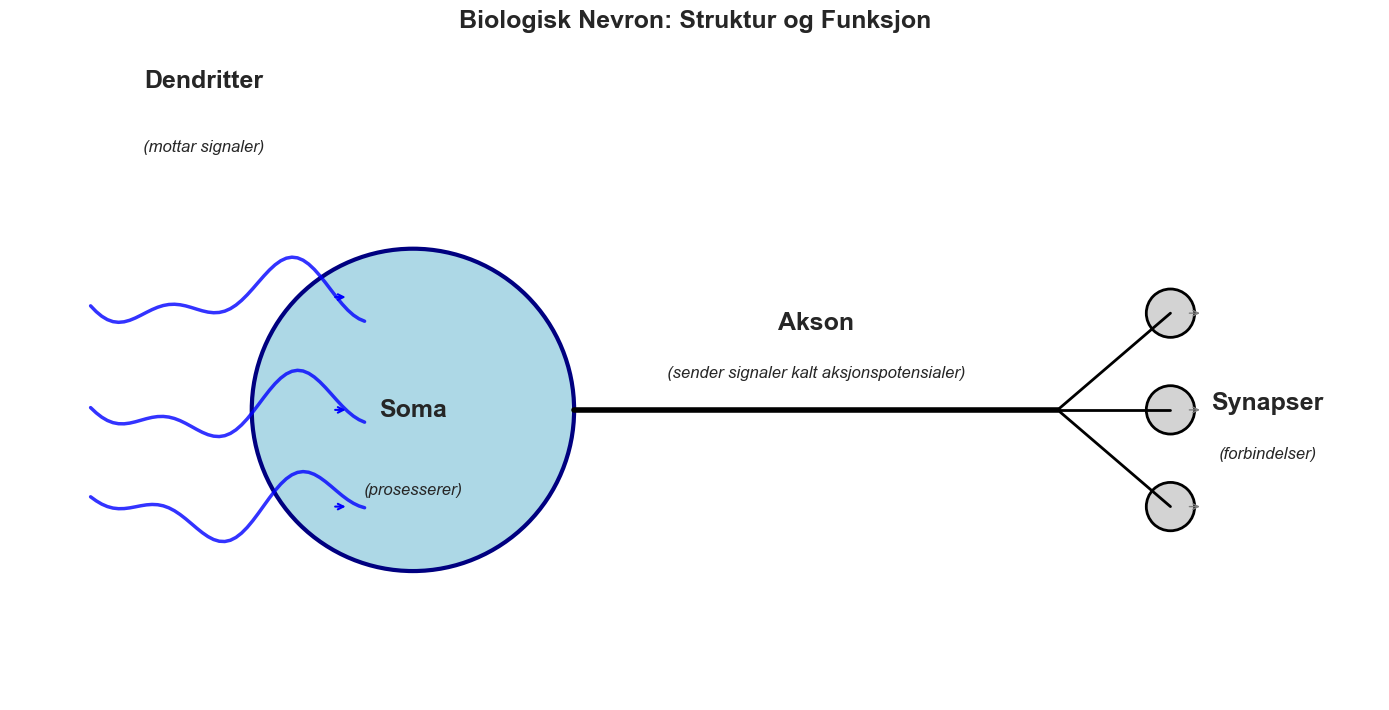

In [4]:
# Visualiser et biologisk nevron
def plot_biological_neuron():
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Tegn dendritter (mer realistiske, bølgete linjer som peker mot soma)
    dendrite_positions = [2.2, 2.8, 3.5] # Y-posisjoner for dendritter
    for i, y_pos in enumerate(dendrite_positions):
        # Lag bølgete dendritter som går fra venstre mot soma
        x = np.linspace(0.5, 2.2, 50)
        y = y_pos + 0.15 * np.sin(4 * x + i * 0.5) + 0.1 * np.sin(8 * x)
        ax.plot(x, y, 'b-', linewidth=2.5, alpha=0.8)
        
        # Legg til små piler som peker mot soma
        ax.annotate('', xy=(2.1, y_pos), xytext=(2.0, y_pos),
                   arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))
    
    # Tegn soma (celllegeme) - større og mer sentrert
    soma = Circle((2.5, 2.8), 1.0, color='lightblue', ec='navy', linewidth=3)
    ax.add_patch(soma)
    
    # Tegn akson (hovedlinje)
    ax.plot([3.5, 6.5], [2.8, 2.8], 'k-', linewidth=4)
    
    # Tegn akson-greiner (3 grener)
    branch_y_positions = [2.2, 2.8, 3.4]
    for i, y_pos in enumerate(branch_y_positions):
        # Hovedgren
        ax.plot([6.5, 7.2], [2.8, y_pos], 'k-', linewidth=2)
        
        # Terminaler (synapser) - små sirkler
        terminal = Circle((7.2, y_pos), 0.15, color='lightgray', ec='black', linewidth=2)
        ax.add_patch(terminal)
        
        # Små piler som viser signaloverføring
        ax.annotate('', xy=(7.4, y_pos), xytext=(7.3, y_pos),
                   arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    
    # Legg til etiketter med bedre posisjonering
    ax.text(1.2, 4.8, 'Dendritter', fontsize=18, ha='center', fontweight='bold')
    ax.text(1.2, 4.4, '(mottar signaler)', fontsize=12, ha='center', style='italic')
    
    ax.text(2.5, 2.8, 'Soma', fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(2.5, 2.3, '(prosesserer)', fontsize=12, ha='center', va='center', style='italic')
    
    ax.text(5.0, 3.3, 'Akson', fontsize=18, ha='center', fontweight='bold')
    ax.text(5.0, 3.0, '(sender signaler kalt aksjonspotensialer)', fontsize=12, ha='center', style='italic')
    
    ax.text(7.8, 2.8, 'Synapser', fontsize=18, ha='center', fontweight='bold')
    ax.text(7.8, 2.5, '(forbindelser)', fontsize=12, ha='center', style='italic')
    
    # Sett opp akser
    ax.set_xlim(0, 8.5)
    ax.set_ylim(1, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Biologisk Nevron: Struktur og Funksjon', fontsize=18, fontweight='bold', pad=20)
    
    # Legg til bakgrunnsfarge for bedre kontrast
    ax.set_facecolor('white')
    
    plt.tight_layout()
    plt.show()

plot_biological_neuron()

### Legger til en **biologisk realistisk simulering** av aksjonspotensialet [1]

Dette viser styrken ved å bruke Jupyter Notebooks både for beregninger og forklaringer / figurer og kalles **literate programming** (Donald Knuth, 1984) [2].

[1] AL Hodgkin, AF Huxley. A quantitative description of membrane current and its application to conduction and excitation in nerve. J Physiol. 1952 Aug 28;117(4):500–544.  [[link](https://pmc.ncbi.nlm.nih.gov/articles/PMC1392413)]

[2] https://en.wikipedia.org/wiki/Literate_programming 

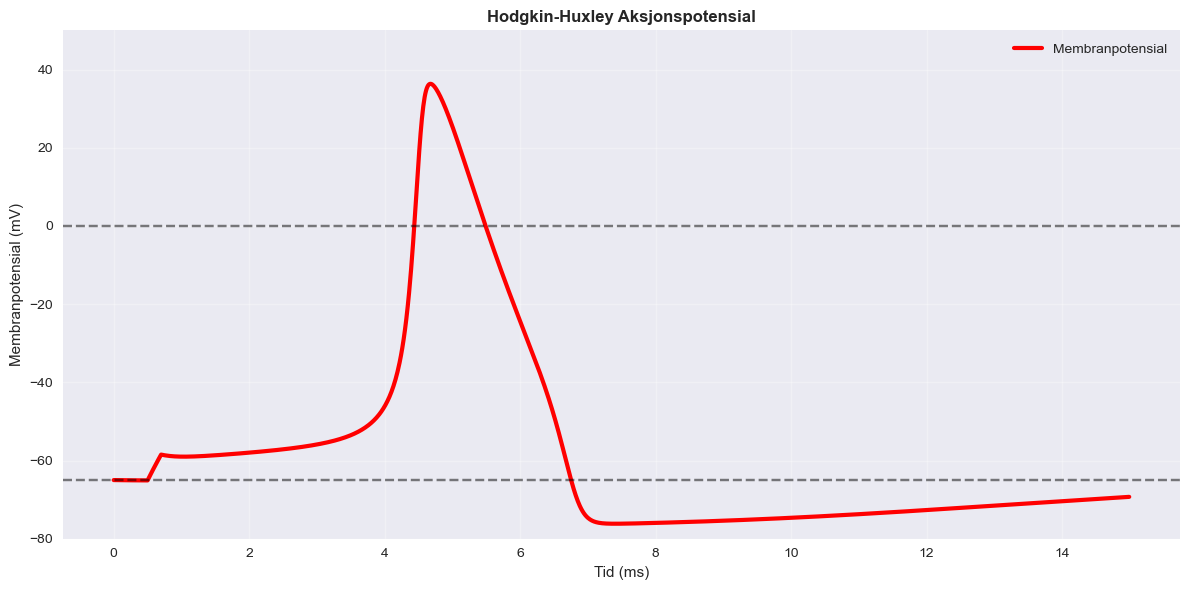

Hodgkin-Huxley Aksjonspotensial (Wikipedia-liknende):
Peak tid: 4.7 ms
Peak spenning: 36.3 mV
Resting potensial: -65.0 mV
Overshoot: 101.3 mV


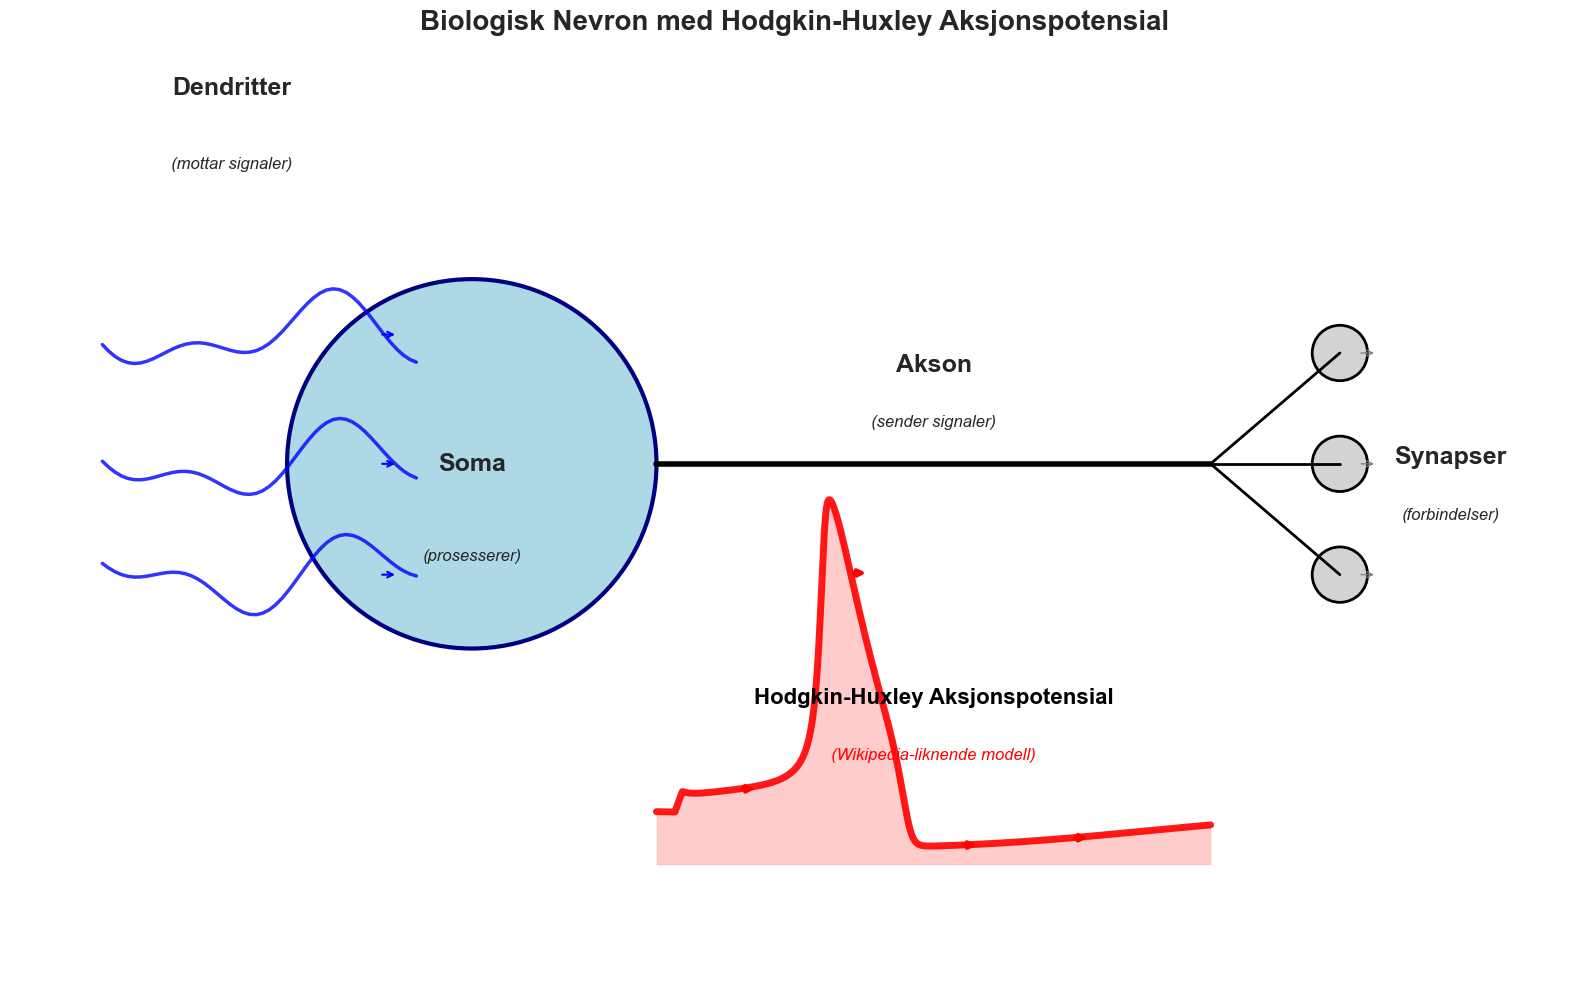

In [5]:
# Hodgkin-Huxley modell med justerte parametre for Wikipedia-liknende graf
def solve_hodgkin_huxley_wikipedia_style(dt=0.01, t_max=15):
    """
    Løser Hodgkin-Huxley likningene med parametre som gir Wikipedia-liknende aksjonspotensial
    
    Parameters:
    dt: tidssteg (ms)
    t_max: maksimal tid (ms)
    
    Returns:
    t: tidsarray
    V: membranpotensial (mV)
    m, h, n: gating variabler
    """
    
    # Konstanter justert for Wikipedia-liknende graf
    C_m = 1.0      # Membrankapasitans (μF/cm²)
    g_Na = 120.0   # Maksimal natriumkonduktans (mS/cm²)
    g_K = 36.0     # Maksimal kaliumkonduktans (mS/cm²)
    g_L = 0.3      # Leak konduktans (mS/cm²)
    E_Na = 50.0    # Natrium reversalspotensial (mV)
    E_K = -77.0    # Kalium reversalspotensial (mV)
    E_L = -54.4    # Leak reversalspotensial (mV)
    
    # Tidsarray
    t = np.arange(0, t_max, dt)
    n_steps = len(t)
    
    # Initialiser arrays
    V = np.zeros(n_steps)
    m = np.zeros(n_steps)
    h = np.zeros(n_steps)
    n = np.zeros(n_steps)
    
    # Initialbetingelser for tydelig aksjonspotensial
    V[0] = -65.0   # Resting potential (mV)
    m[0] = 0.05    # Initial m
    h[0] = 0.6     # Initial h
    n[0] = 0.32    # Initial n
    
    # Stimulus (sterk puls for å trigge tydelig aksjonspotensial)
    I_stim = np.zeros(n_steps)
    I_stim[50:70] = 35.0  # 0.2ms stimulus ved t=0.5ms med høy amplitude (50)
    
    # Rate konstanter
    def alpha_m(V):
        return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    
    def beta_m(V):
        return 4 * np.exp(-(V + 65) / 18)
    
    def alpha_h(V):
        return 0.07 * np.exp(-(V + 65) / 20)
    
    def beta_h(V):
        return 1 / (1 + np.exp(-(V + 35) / 10))
    
    def alpha_n(V):
        return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    
    def beta_n(V):
        return 0.125 * np.exp(-(V + 65) / 80)
    
    # Løs differensiallikningene med Euler-metoden
    for i in range(n_steps - 1):
        # Beregn strømmer
        I_Na = g_Na * m[i]**3 * h[i] * (V[i] - E_Na)
        I_K = g_K * n[i]**4 * (V[i] - E_K)
        I_L = g_L * (V[i] - E_L)
        
        # Total strøm
        I_total = I_stim[i] - I_Na - I_K - I_L
        
        # Oppdater membranpotensial
        dV_dt = I_total / C_m
        V[i+1] = V[i] + dt * dV_dt
        
        # Oppdater gating variabler
        dm_dt = alpha_m(V[i]) * (1 - m[i]) - beta_m(V[i]) * m[i]
        dh_dt = alpha_h(V[i]) * (1 - h[i]) - beta_h(V[i]) * h[i]
        dn_dt = alpha_n(V[i]) * (1 - n[i]) - beta_n(V[i]) * n[i]
        
        m[i+1] = m[i] + dt * dm_dt
        h[i+1] = h[i] + dt * dh_dt
        n[i+1] = n[i] + dt * dn_dt
    
    return t, V, m, h, n

# Generer Hodgkin-Huxley aksjonspotensial med Wikipedia-liknende parametre
t_hh, V_hh, m_hh, h_hh, n_hh = solve_hodgkin_huxley_wikipedia_style()

# Visualiser Hodgkin-Huxley resultatet
def plot_hodgkin_huxley_wikipedia_style():
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Plot aksjonspotensial
    ax.plot(t_hh, V_hh, 'r-', linewidth=3, label='Membranpotensial')
    ax.set_xlabel('Tid (ms)')
    ax.set_ylabel('Membranpotensial (mV)')
    ax.set_title('Hodgkin-Huxley Aksjonspotensial', fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Bedre y-akse for full oversikt
    ax.set_ylim(-80, 50)
    
    # Legg til horisontale linjer for referanse
    ax.axhline(y=-65, color='k', linestyle='--', alpha=0.5, label='Resting potential')
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5, label='0 mV')
    
    plt.tight_layout()
    plt.show()
    
    # Print karakteristiske verdier
    peak_idx = np.argmax(V_hh)
    peak_time = t_hh[peak_idx]
    peak_voltage = V_hh[peak_idx]
    
    print(f"Hodgkin-Huxley Aksjonspotensial (Wikipedia-liknende):")
    print(f"Peak tid: {peak_time:.1f} ms")
    print(f"Peak spenning: {peak_voltage:.1f} mV")
    print(f"Resting potensial: {V_hh[0]:.1f} mV")
    print(f"Overshoot: {peak_voltage - V_hh[0]:.1f} mV")

plot_hodgkin_huxley_wikipedia_style()

# Visualiser et biologisk nevron med Wikipedia-liknende Hodgkin-Huxley aksjonspotensial
def plot_biological_neuron_with_hh_under_axon():
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    
    # Tegn dendritter
    dendrite_positions = [2.2, 2.8, 3.5]
    for i, y_pos in enumerate(dendrite_positions):
        x = np.linspace(0.5, 2.2, 50)
        y = y_pos + 0.15 * np.sin(4 * x + i * 0.5) + 0.1 * np.sin(8 * x)
        ax.plot(x, y, 'b-', linewidth=2.5, alpha=0.8)
        
        ax.annotate('', xy=(2.1, y_pos), xytext=(2.0, y_pos),
                   arrowprops=dict(arrowstyle='->', color='blue', lw=1.5))
    
    # Tegn soma
    soma = Circle((2.5, 2.8), 1.0, color='lightblue', ec='navy', linewidth=3)
    ax.add_patch(soma)
    
    # Tegn akson
    ax.plot([3.5, 6.5], [2.8, 2.8], 'k-', linewidth=4)
    
    # Tegn akson-greiner
    branch_y_positions = [2.2, 2.8, 3.4]
    for i, y_pos in enumerate(branch_y_positions):
        ax.plot([6.5, 7.2], [2.8, y_pos], 'k-', linewidth=2)
        terminal = Circle((7.2, y_pos), 0.15, color='lightgray', ec='black', linewidth=2)
        ax.add_patch(terminal)
        ax.annotate('', xy=(7.4, y_pos), xytext=(7.3, y_pos),
                   arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    
    # Tegn Wikipedia-liknende Hodgkin-Huxley aksjonspotensial rett under aksonet
    def draw_wikipedia_hh_ap_under_axon(ax, start_x, end_x, y_pos):
        # Interpoler Hodgkin-Huxley data til akson-lengde
        x_ap = np.linspace(start_x, end_x, len(V_hh))
        
        # Skaler aksjonspotensialet for å passe under aksonet
        V_scaled = V_hh / 60  # Juster skaleringsfaktor for proporsjonalt aksjonspotensial (50)
        
        # Plasser kurven rett under aksonet
        y_ap = y_pos - 0.8 + V_scaled
        
        # Tegn aksjonspotensial som tykk rød linje
        ax.plot(x_ap, y_ap, 'r-', linewidth=5, alpha=0.9)
        
        # Legg til fylling under kurven for ekstra synlighet
        ax.fill_between(x_ap, y_ap, y_ap.min() - 0.1, color='red', alpha=0.2)
        
        # Legg til piler som viser retning
        arrow_positions = [0.15, 0.35, 0.55, 0.75]
        for pos in arrow_positions:
            idx = int(pos * len(x_ap))
            if idx < len(x_ap):
                x_arrow = x_ap[idx]
                y_arrow = y_ap[idx]
                ax.annotate('', xy=(x_arrow + 0.1, y_arrow), xytext=(x_arrow, y_arrow),
                           arrowprops=dict(arrowstyle='->', color='red', lw=3))
        
        # Vertikale forbindelseslinjer fjernet - ikke informative
    
    # Tegn Wikipedia-liknende Hodgkin-Huxley aksjonspotensial under hovedakson
    draw_wikipedia_hh_ap_under_axon(ax, 3.5, 6.5, 2.8)
    
    # Legg til etiketter
    ax.text(1.2, 4.8, 'Dendritter', fontsize=18, ha='center', fontweight='bold')
    ax.text(1.2, 4.4, '(mottar signaler)', fontsize=12, ha='center', style='italic')
    
    ax.text(2.5, 2.8, 'Soma', fontsize=18, ha='center', va='center', fontweight='bold')
    ax.text(2.5, 2.3, '(prosesserer)', fontsize=12, ha='center', va='center', style='italic')
    
    ax.text(5.0, 3.3, 'Akson', fontsize=18, ha='center', fontweight='bold')
    ax.text(5.0, 3.0, '(sender signaler)', fontsize=12, ha='center', style='italic')
    
    ax.text(7.8, 2.8, 'Synapser', fontsize=18, ha='center', fontweight='bold')
    ax.text(7.8, 2.5, '(forbindelser)', fontsize=12, ha='center', style='italic')
    
    # Legg til forklaring for aksjonspotensialet
    ax.text(5.0, 1.5, 'Hodgkin-Huxley Aksjonspotensial', fontsize=16, ha='center', fontweight='bold', color='black')
    ax.text(5.0, 1.2, '(Wikipedia-liknende modell)', fontsize=12, ha='center', style='italic', color='red')
    
    # Sett opp akser
    ax.set_xlim(0, 8.5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Biologisk Nevron med Hodgkin-Huxley Aksjonspotensial', fontsize=20, fontweight='bold', pad=20)
    ax.set_facecolor('white')
    
    plt.tight_layout()
    plt.show()

plot_biological_neuron_with_hh_under_axon()


### 🧠 Aksjonspotensialet: Hjernens "Elektriske Signal"

Aksjonspotensialet er det fundamentale elektriske signalet som nevroner bruker for å kommunisere. Tenk på det som hjernens "morsekode" - et kort, kraftig elektrisk støt som sender informasjon fra ett nevron til det neste.

#### 🔋 Hva er et Aksjonspotensial? 

Et aksjonspotensial er en rask, kortvarig endring i elektrisk spenning over nevronets membran. Det kan sammenlignes med:
- **En liten "batteri-ladning"** som sendes gjennom aksonet
- **Et elektrisk støt** som trigges når nevronet mottar nok stimulering
- **En "domino-effekt"** som sprer seg langs aksonet

#### ⚡ Hvordan Dannes et Aksjonspotensial? (se også "dypdykk" nedenfor)

**1. Hvilepotensialet (-65 mV)**
- Nevronet "hviler" med negativ spenning inne i cellen
- Som et ladd batteri som venter på å bli brukt
- Natrium (Na⁺) og kalium (K⁺) ioner er i balanse

**2. Depolarisering (opp til +40 mV)**
- Når nevronet mottar nok signaler, "åpnes" natrium-kanaler
- Natrium strømmer inn i cellen (som å åpne en sluse)
- Spenningen endres raskt fra negativ til positiv
- Dette er "triggersignalet" for aksjonspotensialet

**3. Repolarisering (tilbake til -65 mV)**
- Kalium-kanaler åpnes og kalium strømmer ut
- Natrium-kanaler lukkes
- Spenningen går tilbake til hvilestand
- Nevronet er klar for neste signal

#### 🎯 Hvorfor er Dette Viktig for Helsepersonell?

**Klinisk Relevans:**
- **Hjertesykdommer**: Hjertemuskelen bruker lignende mekanismer
- **Nevrologiske lidelser**: Epilepsi, Parkinsons, Alzheimers
- **Medikamenter**: Mange legemidler påvirker ionekanaler
- **Anestesi**: Lokalanestetika blokkerer natrium-kanaler

**Praktiske Eksempler:**
- **EKG**: Hjertets aksjonspotensialer registreres som elektrokardiogram
- **EEG**: Hjernens aksjonspotensialer måles som elektroencefalogram
- **Nerveblokade**: Lokalanestetika stopper smerte ved å blokkere aksjonspotensialer

#### 🔬 Hodgkin-Huxley Modellen: "Resepten" for Aksjonspotensialet

Alan Hodgkin og Andrew Huxley vant Nobelprisen i 1963 for å beskrive matematisk hvordan aksjonspotensialet dannes. Deres modell er som en "resept" som forklarer:

**Ingredienser:**
- **Natrium-ioner (Na⁺)**: "Aktiverer" signalet
- **Kalium-ioner (K⁺)**: "Deaktiverer" signalet  
- **Membranpotensial**: "Spenningen" over cellmembranen
- **Ionkanaler**: "Dører" som åpnes og lukkes

**Prosessen:**
1. **Stimulering** → Natrium-kanaler åpnes
2. **Depolarisering** → Spenning øker raskt
3. **Kalium-aktivering** → Kalium-kanaler åpnes
4. **Repolarisering** → Spenning går tilbake til hvilestand
5. **Refrakter periode** → Nevronet kan ikke fyre igjen umiddelbart

#### 💡 Praktiske Implikasjoner

**For Medisinere:**
- Forstå grunnlaget for nevrologisk diagnostikk og behandling
- Vite hvordan medikamenter påvirker ionekanaler og nervefunksjon
- Forstå mekanismene bak epilepsi, migrene og andre nevrologiske lidelser
- Vite hvordan anestesi og smertestillende medikamenter fungerer
- Forstå sammenhengen mellom hjertesykdommer og elektriske signaler
- Vite hvordan EKG og EEG brukes i diagnostikk

**For Psykologer:**
- Forstå hvordan hjernens elektriske aktivitet påvirker atferd og kognisjon
- Vite hvordan stress og angst påvirker nervefunksjon
- Forstå grunnlaget for nevrofeedback og biofeedback behandlinger
- Vite hvordan meditasjon og avslapning påvirker hjernens elektriske aktivitet
- Forstå sammenhengen mellom søvn og nervefunksjon
- Vite hvordan traumer kan påvirke hjernens elektriske mønstre

**For Sykepleiere:**
- Forstå hvordan medikamenter påvirker nervecelle-funksjon
- Vite at aksjonspotensialer er grunnlaget for kommunikasjon mellom nerveceller
- Forstå hvorfor visse behandlinger fungerer

**For Legeassistenter:**
- Forstå grunnlaget for EKG- og EEG-tolkning
- Vite hvordan anestesi påvirker nervesystemet
- Forstå sammenhengen mellom ioner og nervefunksjon

**For Fysioterapeuter:**
- Forstå hvordan muskelkontraksjoner trigges
- Vite at alle bevegelser starter med aksjonspotensialer
- Forstå grunnlaget for elektrostimulering

**For AI-eksperter:**
- Forstå hvordan biologiske nevroner inspirerer kunstige nevroner
- Vite hvordan aksjonspotensialer kan modelleres med aktiveringsfunksjoner
- Forstå grunnlaget for spiking neural networks (SNN)
- Vite hvordan timing og frekvens av signaler påvirker informasjonsbehandling
- Forstå sammenhengen mellom synaptisk plastisitet og læringsalgoritmer
- Vite hvordan biologisk realisme kan forbedre AI-modeller
- Forstå hvordan refrakter perioder kan implementeres i AI-systemer
- Vite hvordan ionekanaler kan simuleres med matematiske modeller

#### 🎓 Enkel Analogi

Tenk på aksjonspotensialet som en **"elektrisk tsunami"**:

1. **Hvile**: Havet er rolig (negativ spenning)
2. **Trigger**: Et jordskjelv skjer (stimulering)
3. **Tsunami**: En stor bølge bygges opp (depolarisering)
4. **Bølgen**: Den sprer seg langs kysten (aksonet)
5. **Tilbakegang**: Havet blir rolig igjen (repolarisering)

Akkurat som en tsunami kan ikke stoppes når den først er startet, kan ikke et aksjonspotensial stoppes når det først er trigget - det må "kjøre ut" til slutten av aksonet.

#### 🔗 Sammenheng med Nevrale Nettverk

Aksjonspotensialet er grunnlaget for hvordan kunstige nevroner fungerer:
- **Input** = Stimulering som trigger aksjonspotensialet
- **Prosessering** = Depolarisering og repolarisering
- **Output** = Aksjonspotensialet som sendes videre
- **Aktiveringsfunksjon** = "Bryteren" som bestemmer når nevronet skal fyre

Dette er grunnen til at vi kan simulere hjernens funksjon med datamaskiner - vi forstår den grunnleggende "elektriske koden" som hjernen bruker!

#### 🔬 Dypdykk - detaljert illustrasjon av det dynamiske forløp til all komponenter som er med å skape aksjonspotensialet

Koden lager 8 subplots som viser:

1. **Stimulus** - Den eksterne stimuleringen
2. **Membranpotensial** - Det resulterende aksjonspotensialet
3. **Gating variabler** - m, h, n variablene over tid
4. **Konduktanser** - De faktiske konduktansverdiene
5. **Ionestrømmer** - Strømmene gjennom hver ionekanal
6. **Total strøm** - Summen av alle strømmer
7. **Strømbalanse** - Sammenligning av stimulus og utstrømmer
8. **Faseplott** - Membranpotensial vs. endringshastighet

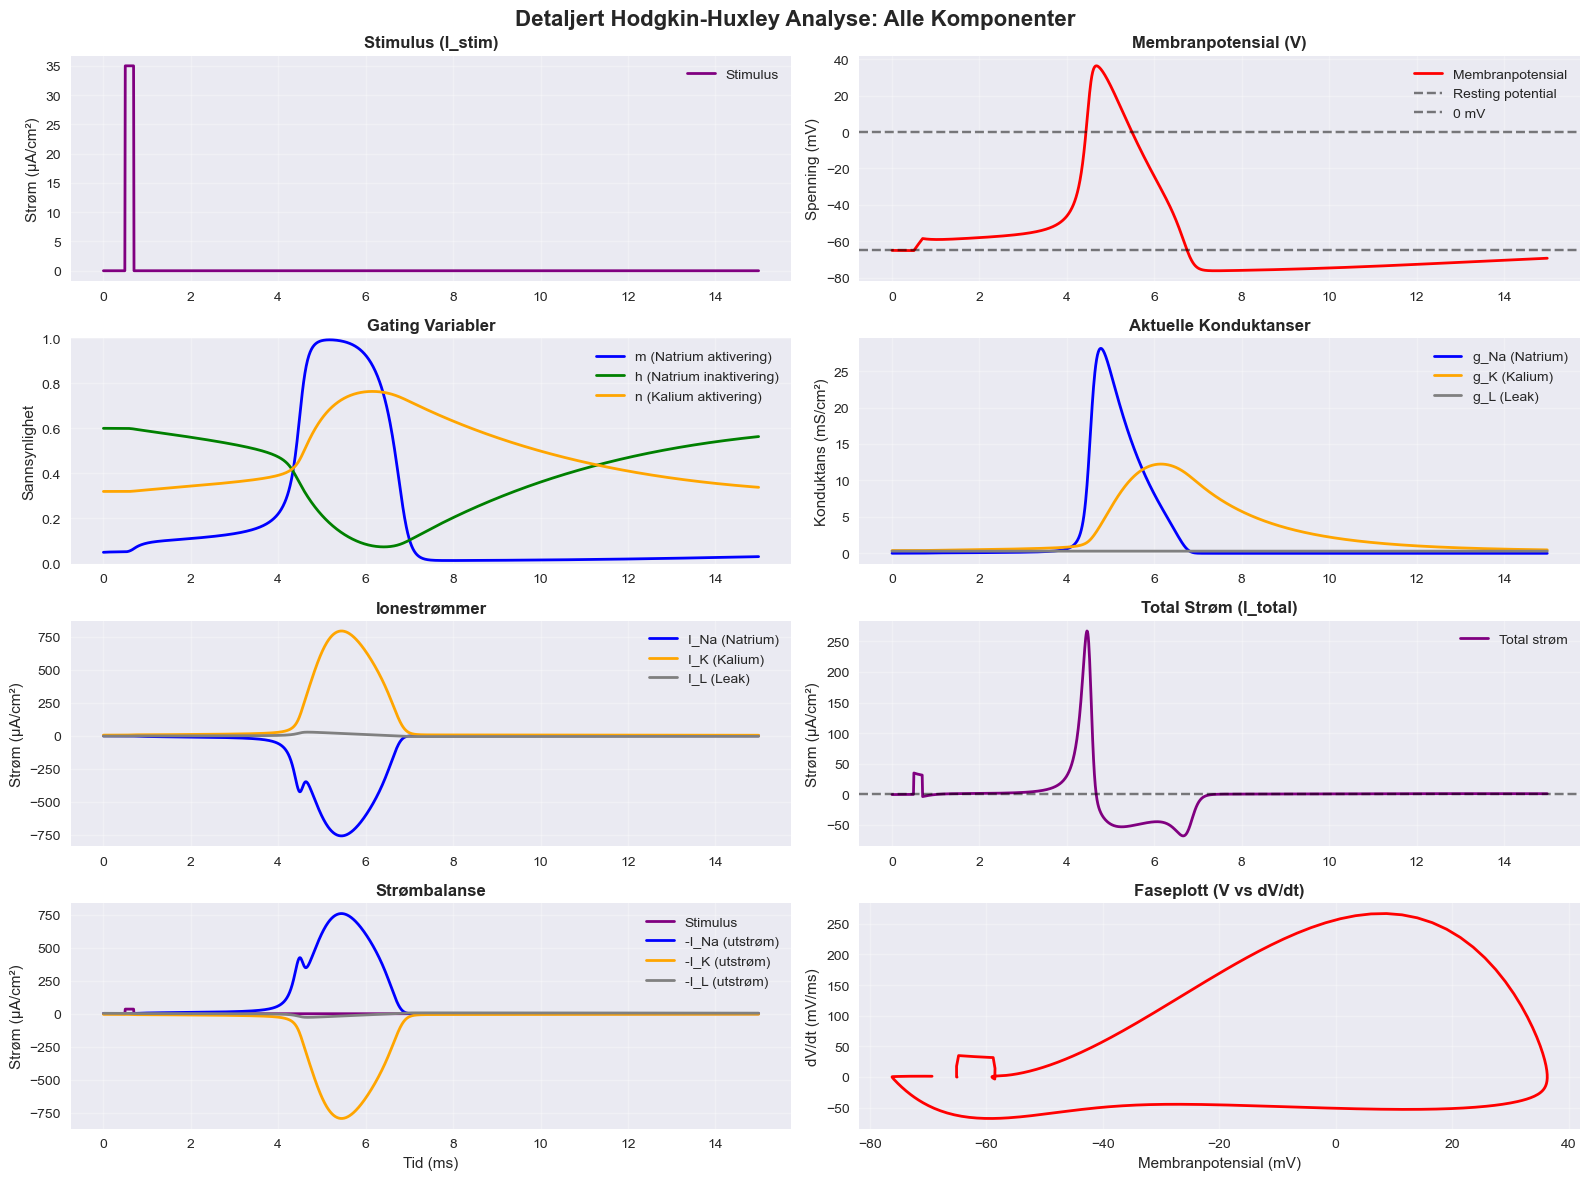

🔬 DETALJERT HODGKIN-HUXLEY ANALYSE
📊 Peak-verdier:
   Peak tid: 4.7 ms
   Peak spenning: 36.3 mV
   Peak m: 0.909
   Peak h: 0.295
   Peak n: 0.537

⚡ Strøm-verdier ved peak:
   I_Na: -363.25 μA/cm²
   I_K: 340.54 μA/cm²
   I_L: 27.22 μA/cm²
   I_total: -4.51 μA/cm²

🔧 Konduktans-verdier ved peak:
   g_Na: 26.60 mS/cm²
   g_K: 3.00 mS/cm²
   g_L: 0.30 mS/cm²

⏱️  Tidskonstanter:
   τ_m: 0.29 ms
   τ_n: 1.67 ms


In [6]:
# Detaljert analyse av Hodgkin-Huxley komponenter
def plot_detailed_hodgkin_huxley_analysis():
    """
    Plotter alle komponenter i Hodgkin-Huxley modellen for å vise hvordan aksjonspotensialet dannes
    """
    # Generer data på nytt for å være sikker
    t, V, m, h, n = solve_hodgkin_huxley_wikipedia_style(dt=0.01, t_max=15)
    
    # Beregn alle komponenter
    C_m = 1.0
    g_Na = 120.0
    g_K = 36.0
    g_L = 0.3
    E_Na = 50.0
    E_K = -77.0
    E_L = -54.4
    
    # Stimulus
    I_stim = np.zeros(len(t))
    I_stim[50:70] = 35.0
    
    # Beregn strømmer
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K = g_K * n**4 * (V - E_K)
    I_L = g_L * (V - E_L)
    I_total = I_stim - I_Na - I_K - I_L
    
    # Beregn konduktanser
    g_Na_actual = g_Na * m**3 * h
    g_K_actual = g_K * n**4
    g_L_actual = g_L * np.ones_like(t)
    
    # Opprett subplots
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle('Detaljert Hodgkin-Huxley Analyse: Alle Komponenter', fontsize=16, fontweight='bold')
    
    # Plot 1: Stimulus
    axes[0,0].plot(t, I_stim, 'purple', linewidth=2, label='Stimulus')
    axes[0,0].set_title('Stimulus (I_stim)', fontweight='bold')
    axes[0,0].set_ylabel('Strøm (μA/cm²)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()
    
    # Plot 2: Membranpotensial
    axes[0,1].plot(t, V, 'red', linewidth=2, label='Membranpotensial')
    axes[0,1].axhline(y=-65, color='k', linestyle='--', alpha=0.5, label='Resting potential')
    axes[0,1].axhline(y=0, color='k', linestyle='--', alpha=0.5, label='0 mV')
    axes[0,1].set_title('Membranpotensial (V)', fontweight='bold')
    axes[0,1].set_ylabel('Spenning (mV)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()
    
    # Plot 3: Gating variabler
    axes[1,0].plot(t, m, 'blue', linewidth=2, label='m (Natrium aktivering)')
    axes[1,0].plot(t, h, 'green', linewidth=2, label='h (Natrium inaktivering)')
    axes[1,0].plot(t, n, 'orange', linewidth=2, label='n (Kalium aktivering)')
    axes[1,0].set_title('Gating Variabler', fontweight='bold')
    axes[1,0].set_ylabel('Sannsynlighet')
    axes[1,0].set_ylim(0, 1)
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()
    
    # Plot 4: Konduktanser
    axes[1,1].plot(t, g_Na_actual, 'blue', linewidth=2, label='g_Na (Natrium)')
    axes[1,1].plot(t, g_K_actual, 'orange', linewidth=2, label='g_K (Kalium)')
    axes[1,1].plot(t, g_L_actual, 'gray', linewidth=2, label='g_L (Leak)')
    axes[1,1].set_title('Aktuelle Konduktanser', fontweight='bold')
    axes[1,1].set_ylabel('Konduktans (mS/cm²)')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()
    
    # Plot 5: Ionestrømmer
    axes[2,0].plot(t, I_Na, 'blue', linewidth=2, label='I_Na (Natrium)')
    axes[2,0].plot(t, I_K, 'orange', linewidth=2, label='I_K (Kalium)')
    axes[2,0].plot(t, I_L, 'gray', linewidth=2, label='I_L (Leak)')
    axes[2,0].set_title('Ionestrømmer', fontweight='bold')
    axes[2,0].set_ylabel('Strøm (μA/cm²)')
    axes[2,0].grid(True, alpha=0.3)
    axes[2,0].legend()
    
    # Plot 6: Total strøm
    axes[2,1].plot(t, I_total, 'purple', linewidth=2, label='Total strøm')
    axes[2,1].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[2,1].set_title('Total Strøm (I_total)', fontweight='bold')
    axes[2,1].set_ylabel('Strøm (μA/cm²)')
    axes[2,1].grid(True, alpha=0.3)
    axes[2,1].legend()
    
    # Plot 7: Strømmer sammenligning
    axes[3,0].plot(t, I_stim, 'purple', linewidth=2, label='Stimulus')
    axes[3,0].plot(t, -I_Na, 'blue', linewidth=2, label='-I_Na (utstrøm)')
    axes[3,0].plot(t, -I_K, 'orange', linewidth=2, label='-I_K (utstrøm)')
    axes[3,0].plot(t, -I_L, 'gray', linewidth=2, label='-I_L (utstrøm)')
    axes[3,0].set_title('Strømbalanse', fontweight='bold')
    axes[3,0].set_xlabel('Tid (ms)')
    axes[3,0].set_ylabel('Strøm (μA/cm²)')
    axes[3,0].grid(True, alpha=0.3)
    axes[3,0].legend()
    
    # Plot 8: Faseplott (V vs dV/dt)
    dV_dt = np.gradient(V, t)
    axes[3,1].plot(V, dV_dt, 'red', linewidth=2)
    axes[3,1].set_title('Faseplott (V vs dV/dt)', fontweight='bold')
    axes[3,1].set_xlabel('Membranpotensial (mV)')
    axes[3,1].set_ylabel('dV/dt (mV/ms)')
    axes[3,1].grid(True, alpha=0.3)
    
    # Juster layout
    plt.tight_layout()
    plt.show()
    
    # Print detaljerte verdier
    print("🔬 DETALJERT HODGKIN-HUXLEY ANALYSE")
    print("=" * 50)
    
    # Finn peak-verdier
    peak_idx = np.argmax(V)
    peak_time = t[peak_idx]
    peak_voltage = V[peak_idx]
    
    print(f"📊 Peak-verdier:")
    print(f"   Peak tid: {peak_time:.1f} ms")
    print(f"   Peak spenning: {peak_voltage:.1f} mV")
    print(f"   Peak m: {m[peak_idx]:.3f}")
    print(f"   Peak h: {h[peak_idx]:.3f}")
    print(f"   Peak n: {n[peak_idx]:.3f}")
    
    print(f"\n⚡ Strøm-verdier ved peak:")
    print(f"   I_Na: {I_Na[peak_idx]:.2f} μA/cm²")
    print(f"   I_K: {I_K[peak_idx]:.2f} μA/cm²")
    print(f"   I_L: {I_L[peak_idx]:.2f} μA/cm²")
    print(f"   I_total: {I_total[peak_idx]:.2f} μA/cm²")
    
    print(f"\n🔧 Konduktans-verdier ved peak:")
    print(f"   g_Na: {g_Na_actual[peak_idx]:.2f} mS/cm²")
    print(f"   g_K: {g_K_actual[peak_idx]:.2f} mS/cm²")
    print(f"   g_L: {g_L_actual[peak_idx]:.2f} mS/cm²")
    
    # Beregn tidskonstanter
    def find_time_constant(t, var, start_idx, end_idx):
        """Finn tidskonstanten for en variabel"""
        start_val = var[start_idx]
        end_val = var[end_idx]
        target_val = start_val + 0.63 * (end_val - start_val)
        
        for i in range(start_idx, end_idx):
            if var[i] >= target_val:
                return t[i] - t[start_idx]
        return None
    
    # Finn tidskonstanter for gating variabler
    m_tau = find_time_constant(t, m, 50, 100)
    h_tau = find_time_constant(t, h, 50, 200)
    n_tau = find_time_constant(t, n, 50, 300)
    
    print(f"\n⏱️  Tidskonstanter:")
    if m_tau: print(f"   τ_m: {m_tau:.2f} ms")
    if h_tau: print(f"   τ_h: {h_tau:.2f} ms")
    if n_tau: print(f"   τ_n: {n_tau:.2f} ms")

# Kjør den detaljerte analysen
plot_detailed_hodgkin_huxley_analysis()

#### 🔬 Matematisk Beskrivelse av Hodgkin-Huxley Modellen

*For **spesielt interesserte**: Den komplette matematiske formuleringen*

##### 📐 Hva er en Differensiallikning?

**Enkel definisjon:**
En differensiallikning beskriver hvordan en størrelse endrer seg over tid. Den forteller oss ikke bare hva som skjer, men **hvor raskt** det skjer.

**Eksempel fra hverdagen:**
- **Temperatur**: "Kaffen kjøles ned med 2°C per minutt"
- **Matematisk**: $\frac{dT}{dt} = -2$ (der T er temperatur, t er tid)
- **Betydning**: For hver minutt som går, synker temperaturen med 2 grader

**I biologien:**
- **Populasjon**: "Antall bakterier øker med 10% per time"
- **Matematisk**: $\frac{dP}{dt} = 0.1P$ (der P er antall bakterier)
- **Betydning**: Jo flere bakterier, desto raskere vokser de

##### 🔗 Kobling av Differensiallikninger

**Hodgkin-Huxley modellen har 4 koblede differensiallikninger:**

1. **Membranpotensial** avhenger av ionestrømmer:
   $$\frac{dV}{dt} = f(V, m, h, n)$$

2. **Gating variabler** avhenger av membranpotensial:
   $$\frac{dm}{dt} = f(V)$$
   $$\frac{dh}{dt} = f(V)$$
   $$\frac{dn}{dt} = f(V)$$

3. **Ionestrømmer** avhenger av både V og gating variabler:
   $$I_{Na} = f(V, m, h)$$
   $$I_K = f(V, n)$$

**Hvorfor er de koblet?**
- **V** påvirker **m, h, n** (spenning åpner/lukker kanaler)
- **m, h, n** påvirker **I_Na, I_K** (åpne kanaler lar ioner strømme)
- **I_Na, I_K** påvirker **V** (ionestrømmer endrer spenning)
- **Resultatet**: En "feedback-loop" som skaper aksjonspotensialet

##### 🧠 Biologisk Analogi

**Tenk på det som en "domino-effekt":**
1. **Stimulus** → Endrer membranpotensial (V)
2. **V endres** → Åpner natriumkanaler (m øker)
3. **m øker** → Mer natrium strømmer inn (I_Na øker)
4. **I_Na øker** → V endres enda mer (depolarisering)
5. **V øker** → Åpner kaliumkanaler (n øker)
6. **n øker** → Kalium strømmer ut (I_K øker)
7. **I_K øker** → V går tilbake (repolarisering)

**Hver "domino-brikke" påvirker de andre** - det er derfor vi trenger koblede differensiallikninger!

##### 🔢 Numerisk Løsning

**Problem**: Vi kan ikke løse 4 koblede differensiallikninger analytisk (med en lukket formel)
**Løsning**: Euler-metoden - vi "hopper" i små tidssteg

**Euler-metoden:**
$$V_{i+1} = V_i + \Delta t \cdot \frac{dV}{dt}\Big|_{V_i}$$

**Hvorfor fungerer det?**
- Vi starter med kjente startverdier
- Vi beregner endringshastigheten
- Vi "hopper" et lite steg fremover
- Vi gjentar prosessen

**Eksempel:**
- **Start**: V₀ = -65 mV
- **Beregn**: dV/dt = +50 mV/ms
- **Hopp**: V₁ = -65 + 0.01 × 50 = -64.5 mV
- **Gjenta**: V₂ = -64.5 + 0.01 × 45 = -64.05 mV
- **Og så videre...**

##### 🏥 Klinisk Relevans

**Hvorfor er dette viktig for helsepersonell?**
- **Medikamenter**: Påvirker ionekanaler → endrer differensiallikningene
- **Sykdommer**: Mutasjoner endrer parametrene → annerledes aksjonspotensialer
- **Behandling**: Vi kan simulere effekten av behandling på forhånd
- **Diagnostikk**: Uvanlige aksjonspotensialer kan indikere sykdom

**Eksempel - Lokalanestesi:**
- **Lidocain** blokkerer natriumkanaler
- **Effekt**: α_m(V) → 0 (kanaler åpnes ikke)
- **Resultat**: Ingen aksjonspotensialer → ingen smerte
- **Matematisk**: Vi setter g_Na = 0 i modellen

Dette viser hvordan grunnleggende matematikk kan hjelpe oss å forstå og behandle medisinske problemer!


#### Mer presist:
Hodgkin-Huxley modellen beskriver aksjonspotensialet gjennom fire differensiallikninger som modellerer ionekanalenes dynamikk:

**Hovedlikning - Membranpotensial:**
$$\frac{dV}{dt} = \frac{1}{C_m}[I_{stim} - I_{Na} - I_K - I_L]$$

**Ionestrømmer:**
$$I_{Na} = g_{Na} \cdot m^3 \cdot h \cdot (V - E_{Na})$$
$$I_K = g_K \cdot n^4 \cdot (V - E_K)$$
$$I_L = g_L \cdot (V - E_L)$$

**Gating variabler (sannsynligheter for åpne kanaler):**
$$\frac{dm}{dt} = \alpha_m(V) \cdot (1-m) - \beta_m(V) \cdot m$$
$$\frac{dh}{dt} = \alpha_h(V) \cdot (1-h) - \beta_h(V) \cdot h$$
$$\frac{dn}{dt} = \alpha_n(V) \cdot (1-n) - \beta_n(V) \cdot n$$

**Rate konstanter (voltage-avhengige overgangssannsynligheter):**
$$\alpha_m(V) = \frac{0.1(V+40)}{1-e^{-(V+40)/10}}$$
$$\beta_m(V) = 4e^{-(V+65)/18}$$
$$\alpha_h(V) = 0.07e^{-(V+65)/20}$$
$$\beta_h(V) = \frac{1}{1+e^{-(V+35)/10}}$$
$$\alpha_n(V) = \frac{0.01(V+55)}{1-e^{-(V+55)/10}}$$
$$\beta_n(V) = 0.125e^{-(V+65)/80}$$

**Fysiske parametre:**
- $C_m = 1.0$ μF/cm² (membrankapasitans)
- $g_{Na} = 120.0$ mS/cm² (maksimal natriumkonduktans)
- $g_K = 36.0$ mS/cm² (maksimal kaliumkonduktans)
- $g_L = 0.3$ mS/cm² (leak konduktans)
- $E_{Na} = 50.0$ mV (natrium reversalspotensial)
- $E_K = -77.0$ mV (kalium reversalspotensial)
- $E_L = -54.4$ mV (leak reversalspotensial)

**Fysisk tolkning:**
- **$m$**: Sannsynlighet for at natriumkanalen er åpen (aktivering)
- **$h$**: Sannsynlighet for at natriumkanalen ikke er inaktivert
- **$n$**: Sannsynlighet for at kaliumkanalen er åpen
- **$m^3h$**: Sannsynlighet for at natriumkanalen er fullt funksjonell
- **$n^4$**: Sannsynlighet for at kaliumkanalen er fullt funksjonell

**Numerisk løsning:**
Modellen løses ved å integrere differensiallikningene numerisk (Euler-metode):
$$V_{i+1} = V_i + \Delta t \cdot \frac{dV}{dt}\Big|_{V_i}$$
$$m_{i+1} = m_i + \Delta t \cdot \frac{dm}{dt}\Big|_{V_i}$$
$$h_{i+1} = h_i + \Delta t \cdot \frac{dh}{dt}\Big|_{V_i}$$
$$n_{i+1} = n_i + \Delta t \cdot \frac{dn}{dt}\Big|_{V_i}$$

**Klinisk relevans:**
- Modellen predikerer aksjonspotensialets form og timing
- Kan simulere effekten av medikamenter som påvirker ionekanaler
- Brukes til å forstå arvelige hjertearytmier
- Grunnlag for utvikling av pacemaker-algoritmer


-----

## 2. Kunstige Nevroner: Fra Hjernen til Maskinen

### Perceptron: Det Enkleste Nevrale Nettverket

#### 🏛️ Historisk Bakgrunn

Perceptronet ble oppfunnet av **Frank Rosenblatt** i 1957 ved Cornell University. Dette var en revolusjonerende oppdagelse som inspirerte en hel generasjon av AI-forskere. Rosenblatt var inspirert av hvordan biologiske nevroner fungerer, og prøvde å skape en enkel matematisk modell av nervecellen.

**Viktige milepæler:**
- **1957**: Rosenblatt presenterer perceptronet
- **1958**: Første hardware-implementasjon (Mark I Perceptron)
- **1969**: Minsky & Papert viser begrensningene (XOR-problemet)
- **1980-tallet**: "Renaissance" med backpropagation
- **2010-tallet**: Moderne deep learning bygger på perceptron-prinsippene

#### 🧠 Hvordan Perceptronet Simulerer Biologiske Nevroner

Et kunstig nevron (perceptron) fungerer slik:

1. **Input**: Mottar numeriske verdier (x₁, x₂, ..., xₙ)
   - *Tilsvarer*: Synaptiske signaler fra andre nevroner
   - *I medisin*: Symptomer, laboratorieverdier, vitalparametere

2. **Vekter**: Hver input har en vekt (w₁, w₂, ..., wₙ)
   - *Tilsvarer*: Styrken av synaptiske forbindelser
   - *I medisin*: Hvor viktig hver symptom/laboratorieverdi er for diagnosen

3. **Summasjon**: Beregner vektet sum: z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b  (b er bias)
   - *Tilsvarer*: Integrasjon av alle inngående signaler i soma
   - *I medisin*: Vurdering av alle symptomer og funn sammen

4. **Aktivisering**: Anvender en aktiviseringsfunksjon: y = f(z)
   - *Tilsvarer*: Aksjonspotensialet som dannes
   - *I medisin*: Beslutningen om diagnose eller behandling

5. **Output**: Sender resultatet videre
   - *Tilsvarer*: Aksjonspotensialet som sendes til andre nevroner
   - *I medisin*: Diagnose, behandlingsanbefaling, eller videre vurdering

#### 🏥 Medisinske Analogier

**I medisinsk kontekst:**
- **Input** = Pasientens symptomer og funn
- **Vekter** = Erfaringen din med hvor viktig hvert symptom er
- **Summasjon** = Din mentale vurdering av alle funn
- **Aktivisering** = Din beslutning om diagnose
- **Output** = Din anbefaling om oppfølging og behandling

**For Sykepleiere:**
- **Input** = Vitalparametere, pasientobservasjoner
- **Vekter** = Din kliniske erfaring med hver parameter
- **Summasjon** = Din vurdering av pasientens tilstand
- **Aktivisering** = Din beslutning om å varsle lege
- **Output** = Din handling eller anbefaling

**For Psykologer:**
- **Input** = Pasientens atferd, utsagn, testresultater
- **Vekter** = Din teoretiske og kliniske kunnskap
- **Summasjon** = Din psykologiske vurdering
- **Aktivisering** = Din diagnostiske beslutning
- **Output** = Din behandlingsplan eller anbefaling

#### 🔬 Matematisk Formulering

**z = wᵀx + b**

Hvor:
- **w** = vektvektor (synaptiske styrker)
- **x** = inputvektor (inngående signaler)
- **b** = bias (treshold for aktivering)
- **z** = netto input (total stimulering)
- **y = f(z)** = output (aktiveringsnivå)

#### 🎯 Praktiske Eksempler i Medisin

**Eksempel 1: Hjerteinfarkt-diagnose**
- **Input**: Brystsmerter (0-10), EKG-endringer (0-1), troponin-verdier (0-100)
- **Vekter**: Brystsmerter=0.3, EKG=0.5, troponin=0.2
- **Summasjon**: z = 0.3×8 + 0.5×1 + 0.2×85 = 2.4 + 0.5 + 17 = 19.9
- **Aktivisering**: f(19.9) = 1 (høy sannsynlighet for hjerteinfarkt)
- **Output**: "Akutt hjerteinfarkt - umiddelbar behandling"

**Eksempel 2: Depresjons-screening**
- **Input**: Humør (1-10), søvn (1-10), appetitt (1-10), energi (1-10)
- **Vekter**: Alle vekter = 0.25 (like viktige)
- **Summasjon**: z = 0.25×2 + 0.25×3 + 0.25×4 + 0.25×2 = 2.75
- **Aktivisering**: f(2.75) = 0.8 (høy sannsynlighet for depresjon)
- **Output**: "Anbefaler videre psykologisk vurdering"

#### ⚠️ Begrensninger og Utfordringer

**Perceptronet kan bare lære lineære mønstre:**
- Fungerer bra for enkle medisinske beslutninger
- Kan ikke håndtere komplekse, ikke-lineære sammenhenger
- Trenger flere lag (deep learning) for avanserte medisinske problemer

**Eksempler på hva perceptronet IKKE kan:**
- Kompleks bildediagnostikk (krever CNN)
- Tidsrekke-analyse av EKG (krever RNN)
- Flerspråklig tekstanalyse (krever transformer)

#### 🔗 Sammenheng med Moderne AI i Medisin

Perceptronet er grunnlaget for:
- **Deep Learning**: Flere lag av perceptroner
- **CNN**: For bildediagnostikk
- **RNN**: For tidsrekke-data (EKG, EEG)
- **Transformer**: For naturlig språkbehandling

Dette viser hvordan en enkel idé fra 1957 har utviklet seg til de avanserte AI-systemene vi bruker i medisin i dag!


### Visualisering av perceptronet

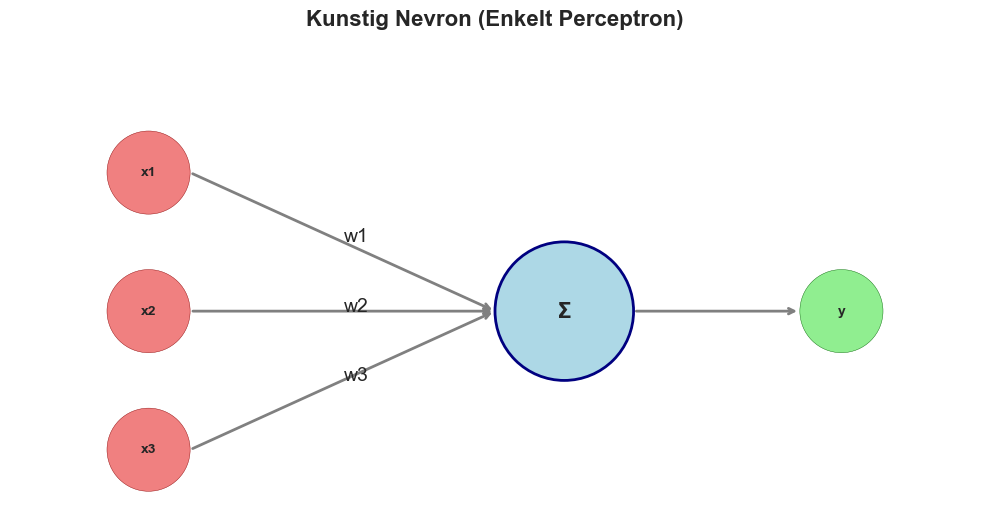

In [7]:
# Visualiser perceptronet
def plot_perceptron():
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Tegn input noder
    for i in range(3):
        circle = Circle((1, 2-i), 0.3, color='lightcoral', ec='darkred')
        ax.add_patch(circle)
        ax.text(1, 2-i, f'x{i+1}', ha='center', va='center', fontweight='bold')
    
    # Tegn hovednevron
    circle = Circle((4, 1), 0.5, color='lightblue', ec='navy', linewidth=2)
    ax.add_patch(circle)
    ax.text(4, 1, 'Σ', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Tegn output
    circle = Circle((6, 1), 0.3, color='lightgreen', ec='darkgreen')
    ax.add_patch(circle)
    ax.text(6, 1, 'y', ha='center', va='center', fontweight='bold')
    
    # Tegn forbindelser
    for i in range(3):
        ax.annotate('', xy=(3.5, 1), xytext=(1.3, 2-i),
                   arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
        # ax.text(2.5, 1.5-i*0.3, f'w{i+1}', ha='center', fontsize=10)
        ax.text(2.5, (2-i + 1)/2, f'w{i+1}', ha='center', fontsize=14)
    
    ax.annotate('', xy=(5.7, 1), xytext=(4.5, 1),
               arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    
    ax.set_xlim(0, 7)
    ax.set_ylim(-0.5, 3)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Kunstig Nevron (Enkelt Perceptron)', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_perceptron()


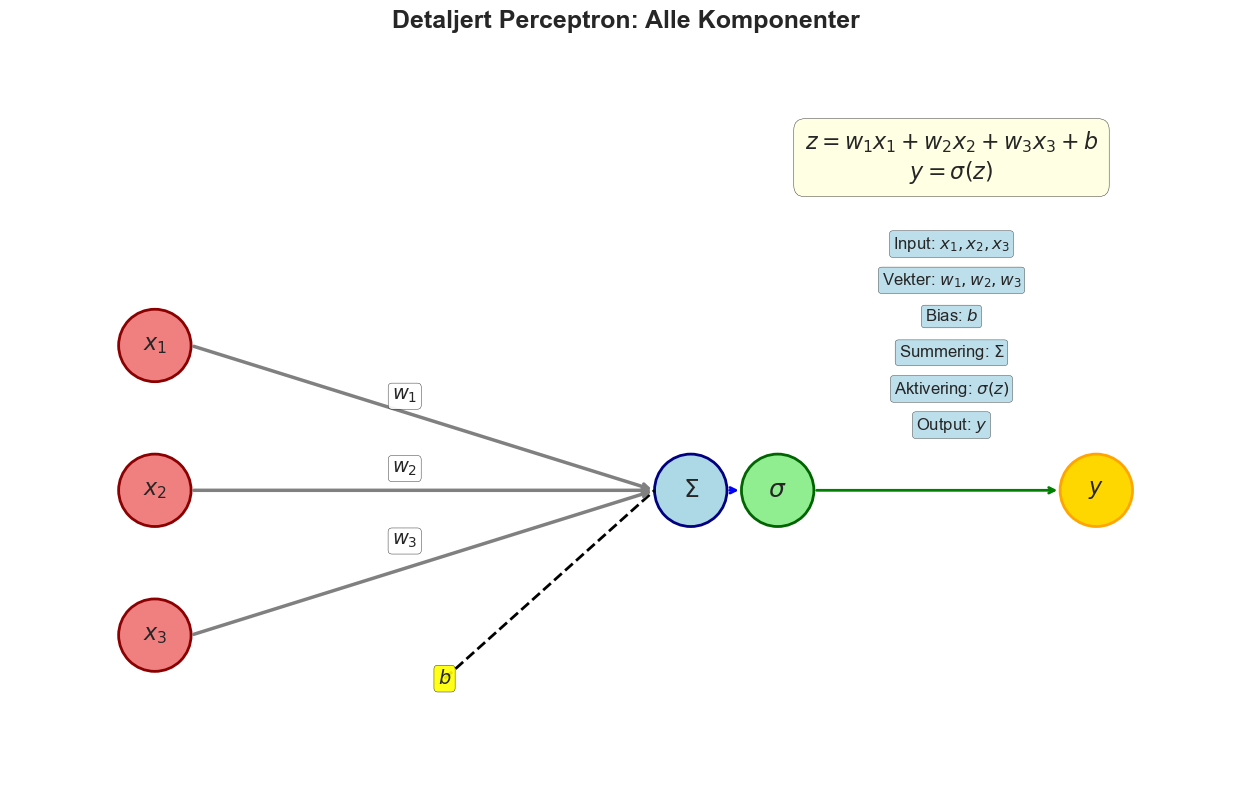

In [8]:
# Forbedret Perceptron-visualisering med LaTeX og bedre layout
def plot_detailed_perceptron():
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Input noder med LaTeX-symboler
    input_positions = [(1, 2.5), (1, 1.5), (1, 0.5)]
    input_labels = [r'$x_1$', r'$x_2$', r'$x_3$']
    
    for i, (pos, label) in enumerate(zip(input_positions, input_labels)):
        # Tegn input node
        circle = Circle(pos, 0.25, color='lightcoral', ec='darkred', linewidth=2)
        ax.add_patch(circle)
        ax.text(pos[0], pos[1], label, ha='center', va='center', fontweight='bold', fontsize=16)
    
    # Hovednevron med summering og aktiveringsfunksjon
    main_pos = (5, 1.5)
    
    # Tegn summeringsdelen
    circle1 = Circle((main_pos[0]-0.3, main_pos[1]), 0.25, color='lightblue', ec='navy', linewidth=2)
    ax.add_patch(circle1)
    ax.text(main_pos[0]-0.3, main_pos[1], r'$\Sigma$', ha='center', va='center', fontweight='bold', fontsize=18)
    
    # Tegn aktiveringsfunksjon
    circle2 = Circle((main_pos[0]+0.3, main_pos[1]), 0.25, color='lightgreen', ec='darkgreen', linewidth=2)
    ax.add_patch(circle2)
    ax.text(main_pos[0]+0.3, main_pos[1], r'$\sigma$', ha='center', va='center', fontweight='bold', fontsize=18)
    
    # Output node
    output_pos = (7.5, 1.5)
    circle = Circle(output_pos, 0.25, color='gold', ec='orange', linewidth=2)
    ax.add_patch(circle)
    ax.text(output_pos[0], output_pos[1], r'$y$', ha='center', va='center', fontweight='bold', fontsize=16)
    
    # Tegn forbindelser med vekter
    weight_values = [r'$w_1$', r'$w_2$', r'$w_3$']
    for i, (input_pos, weight) in enumerate(zip(input_positions, weight_values)):
        # Tegn pil fra input til summering
        ax.annotate('', xy=(main_pos[0]-0.55, main_pos[1]), xytext=(input_pos[0]+0.25, input_pos[1]),
                   arrowprops=dict(arrowstyle='->', lw=2.5, color='gray'))
        
        # Plasser vekt-etikett midt på pilen
        mid_x = (input_pos[0] + main_pos[0]-0.55) / 2
        mid_y = (input_pos[1] + main_pos[1]) / 2
        ax.text(mid_x, mid_y + 0.15, weight, ha='center', va='center', fontweight='bold', 
                fontsize=14, bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9))
    
    # Tegn bias-forbindelse
    bias_pos = (3, 0.2)
    ax.plot([bias_pos[0], main_pos[0]-0.55], [bias_pos[1], main_pos[1]], 'k--', linewidth=2)
    ax.text(bias_pos[0], bias_pos[1], r'$b$', ha='center', va='center', fontweight='bold', 
            fontsize=14, bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.9))
    
    # Tegn forbindelse fra summering til aktiveringsfunksjon
    ax.annotate('', xy=(main_pos[0]+0.05, main_pos[1]), xytext=(main_pos[0]-0.05, main_pos[1]),
               arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
    
    # Tegn forbindelse fra aktiveringsfunksjon til output
    ax.annotate('', xy=(output_pos[0]-0.25, output_pos[1]), xytext=(main_pos[0]+0.55, main_pos[1]),
               arrowprops=dict(arrowstyle='->', lw=2, color='green'))
    
    # Legg til matematisk formel øverst til høyre
    formula_text = r"$z = w_1x_1 + w_2x_2 + w_3x_3 + b$" + "\n" + r"$y = \sigma(z)$"
    ax.text(6.5, 3.8, formula_text, ha='center', va='center', fontsize=16, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.9))
    
    # Legg til komponent-forklaringer øverst til høyre (under formelen)
    explanations = [
        r"Input: $x_1, x_2, x_3$",
        r"Vekter: $w_1, w_2, w_3$", 
        r"Bias: $b$",
        r"Summering: $\Sigma$",
        r"Aktivering: $\sigma(z)$",
        r"Output: $y$"
    ]
    
    # Plasser legend øverst til høyre
    legend_y_start = 3.2
    for i, explanation in enumerate(explanations):
        ax.text(6.5, legend_y_start-i*0.25, explanation, ha='center', va='center', fontsize=12, 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.8))
    
    # Sett opp akser
    ax.set_xlim(0, 8.5)
    ax.set_ylim(-0.5, 4.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Detaljert Perceptron: Alle Komponenter', fontsize=18, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

# Kjør den forbedrede visualiseringen
plot_detailed_perceptron()

-----

## 3. Aktiveringsfunksjoner: Hjernens "brytere"

### Hvorfor trenger vi aktiveringsfunksjoner?

Uten aktiveringsfunksjoner ville nevrale nettverk bare være lineære transformasjoner - uansett hvor mange lag vi har, kan vi alltid redusere det til ett enkelt lag. Aktiveringsfunksjoner introduserer **ikke-linearitet**, som er essensielt for å lære komplekse mønstre.

### Vanlige Aktiveringsfunksjoner

| Funksjon | Formel | Bruk | Fordeler | Ulemper |
|----------|--------|------|----------|---------|
| **Sigmoid** | σ(z) = 1/(1+e⁻ᶻ) | Binær klassifikasjon | Glatt (mange-ganger deriverbar), begrenset | Forsvinnende ("vanishing") gradient  |
| **Tanh** (Tangens hyperbolicus)| tanh(z) | Sentrert output | Større gradienter | Vanishing gradient |
| **ReLU** (Rectified Linear Unit)| max(0,z) | Dype nettverk | Enkel, rask | "Dying ReLU" |
| **Leaky ReLU** | max(0.01z,z) | Forbedring av ReLU | Løser "dying ReLU" | Ekstra parameter |


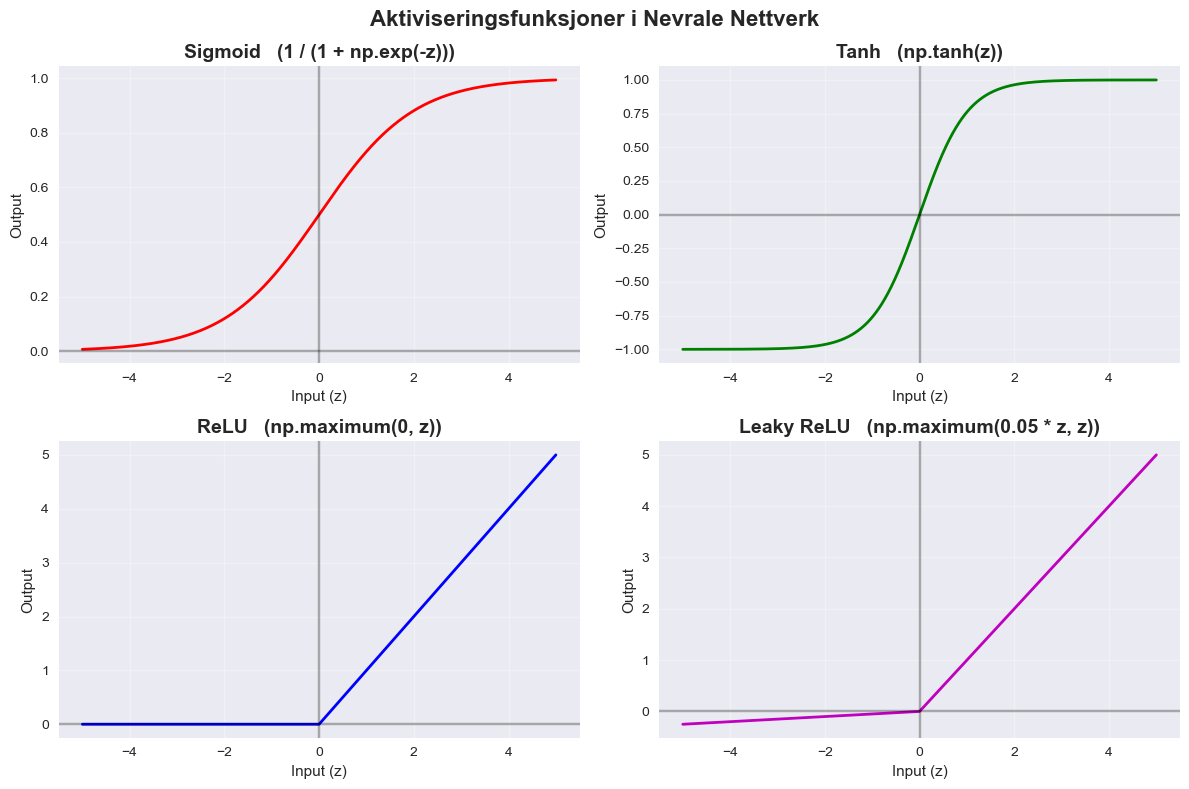

In [9]:
# Visualiser aktiviseringsfunksjoner
def plot_activation_functions():
    z = np.linspace(-5, 5, 1000)
    
    # Definer funksjoner
    sigmoid = 1 / (1 + np.exp(-z))
    tanh = np.tanh(z)
    relu = np.maximum(0, z)
    leaky_relu = np.maximum(0.05 * z, z)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    functions = [
        (sigmoid, 'Sigmoid   (1 / (1 + np.exp(-z)))', 'r'),
        (tanh, 'Tanh   (np.tanh(z))', 'g'),
        (relu, 'ReLU   (np.maximum(0, z))', 'b'),
        (leaky_relu, 'Leaky ReLU   (np.maximum(0.05 * z, z))', 'm')
    ]
    
    for i, (func, name, color) in enumerate(functions):
        axes[i].plot(z, func, color=color, linewidth=2)
        axes[i].set_title(f'{name}', fontsize=14, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('Input (z)')
        axes[i].set_ylabel('Output')
        axes[i].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[i].axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.suptitle('Aktiviseringsfunksjoner i Nevrale Nettverk', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_activation_functions()


### Perceptron-beregninger (PyTorch) 
 - med ulike kombinasjoner av input-signal ($\mathbf{x}$) og type aktiveringsfunksjon (Sigmoid, ReLU, Tanh) tilsvarnede output-resultat ($y$)

🧠 ENKELT PERCEPTRON MED ULIKE AKTIVERINGSFUNKSJONER
📌 Fikserte vekter og bias for rettferdig sammenligning

⚖️  Fikserte vekter: tensor([ 0.5000, -0.8000,  1.2000])
➕ Fikserte bias: tensor([0.3000])

🔍 TEST 1: Blandet
📥 Input: tensor([ 0.5000, -0.3000,  0.8000])
--------------------------------------------------
🧮 Netto input (z): 1.7500
🔵 Sigmoid output: 0.8520
🔴 ReLU output:    1.7500
🟢 Tanh output:    0.9414

🔍 TEST 2: Alle positive
📥 Input: tensor([1., 1., 1.])
--------------------------------------------------
🧮 Netto input (z): 1.2000
🔵 Sigmoid output: 0.7685
🔴 ReLU output:    1.2000
🟢 Tanh output:    0.8337

🔍 TEST 3: Alle negative
📥 Input: tensor([-1., -1., -1.])
--------------------------------------------------
🧮 Netto input (z): -0.6000
🔵 Sigmoid output: 0.3543
🔴 ReLU output:    0.0000
🟢 Tanh output:    -0.5370

🔍 TEST 4: Alle null
📥 Input: tensor([0., 0., 0.])
--------------------------------------------------
🧮 Netto input (z): 0.3000
🔵 Sigmoid output: 0.5744
🔴 ReLU output

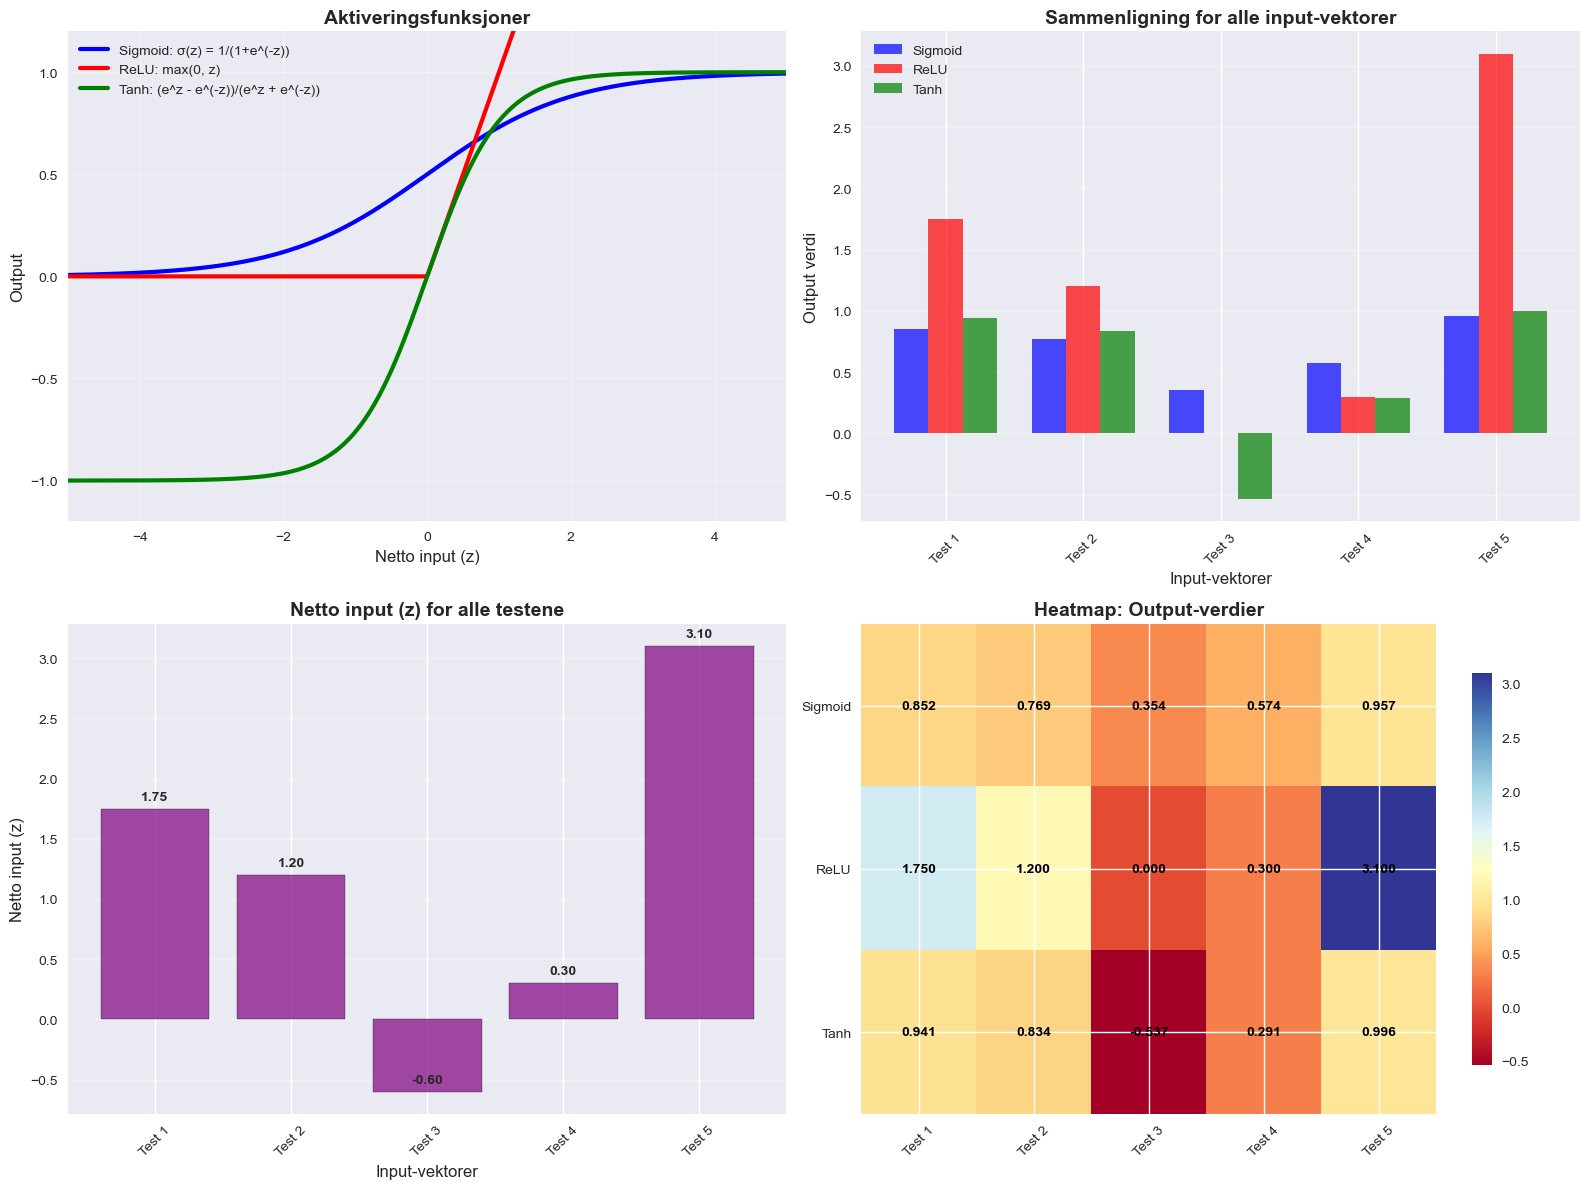


📚 FORKLARING AV AKTIVERINGSFUNKSJONER
🔵 SIGMOID:
   • Output: 0 til 1
   • Brukes ofte i output-lag for klassifikasjon
   • Glatt kurve, deriverbar overalt
   • Kan ha 'vanishing gradient' problem
   • Observer: Alle negative z-verdier gir output < 0.5

🔴 ReLU (Rectified Linear Unit):
   • Output: 0 til +∞
   • Mest populær i dype nettverk
   • Enkel å beregne og derivere
   • Løser 'vanishing gradient' problemet
   • Observer: Alle negative z-verdier gir output = 0

🟢 TANH (Hyperbolic Tangent):
   • Output: -1 til +1
   • Sentrert rundt 0
   • Større gradienter enn sigmoid
   • Brukes i RNN (rekurrente nettverk) og LSTM (lang kortidshukommelse nettverk)
   • Observer: Symmetrisk om origo

🔍 OBSERVASJONER FRA TESTENE:
   • Samme vekter og bias brukes for rettferdig sammenligning
   • Forskjellige input-vektorer viser ulike egenskaper
   • ReLU 'kutter av' negative verdier (output = 0)
   • Sigmoid komprimerer alle verdier til 0-1 området
   • Tanh bevarer både positive og negative ver

In [10]:
# Utvidet implementasjon av enkelt perceptron med fikserte parametere
class SimplePerceptron:
    def __init__(self, input_size, activation='sigmoid', weights=None, bias=None):
        # Bruk fikserte vekter og bias hvis gitt, ellers tilfeldige
        if weights is not None:
            self.weights = weights.clone().detach().requires_grad_(True)
        else:
            self.weights = torch.randn(input_size, requires_grad=True)
            
        if bias is not None:
            self.bias = bias.clone().detach().requires_grad_(True)
        else:
            self.bias = torch.randn(1, requires_grad=True)
            
        self.activation = activation
    
    def forward(self, x):
        # Beregn netto input (z = w^T * x + b)
        z = torch.dot(self.weights, x) + self.bias
        
        # Anvend valgt aktiveringsfunksjon
        if self.activation == 'sigmoid':
            y = torch.sigmoid(z)
        elif self.activation == 'relu':
            y = torch.relu(z)
        elif self.activation == 'tanh':
            y = torch.tanh(z)
        else:
            raise ValueError(f"Ukjent aktiveringsfunksjon: {self.activation}")
            
        return y, z  # Returner både output og netto input
    
    def parameters(self):
        return [self.weights, self.bias]

# Sett random seed for reproduserbare resultater
torch.manual_seed(42)
np.random.seed(42)

print("=" * 70)
print("🧠 ENKELT PERCEPTRON MED ULIKE AKTIVERINGSFUNKSJONER")
print("=" * 70)
print("📌 Fikserte vekter og bias for rettferdig sammenligning")
print()

# Definer fikserte vekter og bias (samme for alle aktiveringsfunksjoner)
fixed_weights = torch.tensor([0.5, -0.8, 1.2], dtype=torch.float32)
fixed_bias = torch.tensor([0.3], dtype=torch.float32)

print(f"⚖️  Fikserte vekter: {fixed_weights}")
print(f"➕ Fikserte bias: {fixed_bias}")
print()

# Definer flere test input-vektorer
test_inputs = [
    torch.tensor([0.5, -0.3, 0.8], dtype=torch.float32),  # Blandet
    torch.tensor([1.0, 1.0, 1.0], dtype=torch.float32),   # Alle positive
    torch.tensor([-1.0, -1.0, -1.0], dtype=torch.float32), # Alle negative
    torch.tensor([0.0, 0.0, 0.0], dtype=torch.float32),   # Alle null
    torch.tensor([2.0, -1.5, 0.5], dtype=torch.float32)   # Store verdier
]

input_names = ["Blandet", "Alle positive", "Alle negative", "Alle null", "Store verdier"]

# Test alle input-vektorer
for i, (x, name) in enumerate(zip(test_inputs, input_names)):
    print(f"🔍 TEST {i+1}: {name}")
    print(f"📥 Input: {x}")
    print("-" * 50)
    
    # Test med Sigmoid aktiveringsfunksjon
    perceptron_sigmoid = SimplePerceptron(3, activation='sigmoid', 
                                        weights=fixed_weights, bias=fixed_bias)
    output_sigmoid, z_sigmoid = perceptron_sigmoid.forward(x)
    
    # Test med ReLU aktiveringsfunksjon
    perceptron_relu = SimplePerceptron(3, activation='relu', 
                                     weights=fixed_weights, bias=fixed_bias)
    output_relu, z_relu = perceptron_relu.forward(x)
    
    # Test med Tanh aktiveringsfunksjon
    perceptron_tanh = SimplePerceptron(3, activation='tanh', 
                                     weights=fixed_weights, bias=fixed_bias)
    output_tanh, z_tanh = perceptron_tanh.forward(x)
    
    # Vis resultater
    print(f"🧮 Netto input (z): {z_sigmoid.item():.4f}")
    print(f"🔵 Sigmoid output: {output_sigmoid.item():.4f}")
    print(f"🔴 ReLU output:    {output_relu.item():.4f}")
    print(f"🟢 Tanh output:    {output_tanh.item():.4f}")
    print()

# Visualiser aktiveringsfunksjonene og sammenlign resultater
def plot_comprehensive_comparison():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Aktiveringsfunksjonene
    x_vals = torch.linspace(-5, 5, 1000)
    ax1.plot(x_vals, torch.sigmoid(x_vals), 'b-', linewidth=3, label='Sigmoid: σ(z) = 1/(1+e^(-z))')
    ax1.plot(x_vals, torch.relu(x_vals), 'r-', linewidth=3, label='ReLU: max(0, z)')
    ax1.plot(x_vals, torch.tanh(x_vals), 'g-', linewidth=3, label='Tanh: (e^z - e^(-z))/(e^z + e^(-z))')
    ax1.set_xlabel('Netto input (z)', fontsize=12)
    ax1.set_ylabel('Output', fontsize=12)
    ax1.set_title('Aktiveringsfunksjoner', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-1.2, 1.2)
    
    # Plot 2: Sammenligning for alle input-vektorer
    all_outputs_sigmoid = []
    all_outputs_relu = []
    all_outputs_tanh = []
    all_z_values = []
    
    for x in test_inputs:
        # Beregn for alle aktiveringsfunksjoner
        z = torch.dot(fixed_weights, x) + fixed_bias
        sigmoid_out = torch.sigmoid(z)
        relu_out = torch.relu(z)
        tanh_out = torch.tanh(z)
        
        all_outputs_sigmoid.append(sigmoid_out.item())
        all_outputs_relu.append(relu_out.item())
        all_outputs_tanh.append(tanh_out.item())
        all_z_values.append(z.item())
    
    x_pos = np.arange(len(input_names))
    width = 0.25
    
    bars1 = ax2.bar(x_pos - width, all_outputs_sigmoid, width, label='Sigmoid', color='blue', alpha=0.7)
    bars2 = ax2.bar(x_pos, all_outputs_relu, width, label='ReLU', color='red', alpha=0.7)
    bars3 = ax2.bar(x_pos + width, all_outputs_tanh, width, label='Tanh', color='green', alpha=0.7)
    
    ax2.set_xlabel('Input-vektorer', fontsize=12)
    ax2.set_ylabel('Output verdi', fontsize=12)
    ax2.set_title('Sammenligning for alle input-vektorer', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f'Test {i+1}' for i in range(len(input_names))], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Plot 3: Netto input (z) for alle testene
    ax3.bar(range(len(all_z_values)), all_z_values, color='purple', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Input-vektorer', fontsize=12)
    ax3.set_ylabel('Netto input (z)', fontsize=12)
    ax3.set_title('Netto input (z) for alle testene', fontsize=14, fontweight='bold')
    ax3.set_xticks(range(len(input_names)))
    ax3.set_xticklabels([f'Test {i+1}' for i in range(len(input_names))], rotation=45)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Legg til verdier på baren
    for i, z_val in enumerate(all_z_values):
        ax3.text(i, z_val + 0.05, f'{z_val:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # Plot 4: Heatmap av alle resultater
    results_matrix = np.array([all_outputs_sigmoid, all_outputs_relu, all_outputs_tanh])
    im = ax4.imshow(results_matrix, cmap='RdYlBu', aspect='auto')
    ax4.set_xticks(range(len(input_names)))
    ax4.set_xticklabels([f'Test {i+1}' for i in range(len(input_names))], rotation=45)
    ax4.set_yticks(range(3))
    ax4.set_yticklabels(['Sigmoid', 'ReLU', 'Tanh'])
    ax4.set_title('Heatmap: Output-verdier', fontsize=14, fontweight='bold')
    
    # Legg til verdier i heatmap
    for i in range(3):
        for j in range(len(input_names)):
            text = ax4.text(j, i, f'{results_matrix[i, j]:.3f}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    # Legg til colorbar
    plt.colorbar(im, ax=ax4, shrink=0.8)
    
    plt.tight_layout()
    plt.show()

# Kjør den omfattende visualiseringen
plot_comprehensive_comparison()

print("\n" + "="*70)
print("📚 FORKLARING AV AKTIVERINGSFUNKSJONER")
print("="*70)
print("🔵 SIGMOID:")
print("   • Output: 0 til 1")
print("   • Brukes ofte i output-lag for klassifikasjon")
print("   • Glatt kurve, deriverbar overalt")
print("   • Kan ha 'vanishing gradient' problem")
print("   • Observer: Alle negative z-verdier gir output < 0.5")
print()
print("🔴 ReLU (Rectified Linear Unit):")
print("   • Output: 0 til +∞")
print("   • Mest populær i dype nettverk")
print("   • Enkel å beregne og derivere")
print("   • Løser 'vanishing gradient' problemet")
print("   • Observer: Alle negative z-verdier gir output = 0")
print()
print("🟢 TANH (Hyperbolic Tangent):")
print("   • Output: -1 til +1")
print("   • Sentrert rundt 0")
print("   • Større gradienter enn sigmoid")
print("   • Brukes i RNN (rekurrente nettverk) og LSTM (lang kortidshukommelse nettverk)")
print("   • Observer: Symmetrisk om origo")
print()
print("🔍 OBSERVASJONER FRA TESTENE:")
print("   • Samme vekter og bias brukes for rettferdig sammenligning")
print("   • Forskjellige input-vektorer viser ulike egenskaper")
print("   • ReLU 'kutter av' negative verdier (output = 0)")
print("   • Sigmoid komprimerer alle verdier til 0-1 området")
print("   • Tanh bevarer både positive og negative verdier")

### OPPGAVE: Gjøre ulike eksperimenter med Perceptron-beregninger, bruk gjerne også håndregning

----- 

## 4. Nevrale Nettverk i Medisin og Helse: Praktiske Anvendelser


#### 🧠 Nevrologi og Psykiatri
- **EEG-analyse**: Deteksjon av epilepsi og søvnforstyrrelser
- **fMRI-tolkning**: Kartlegging av hjerneaktivitet
- **Demens-diagnostikk**: Tidlig deteksjon av Alzheimers sykdom

#### 🫀 Kardiologi
- **EKG-analyse**: Deteksjon av arytmier og hjerteinfarkt
- **Echokardiografi**: Automatisk måling av hjertefunksjon
- **Risikovurdering**: Prediksjon av hjerte-kar-sykdom

#### 🦴 Radiologi
- **Røntgen-tolkning**: Deteksjon av brudd og patologier
- **CT-scanning**: Automatisk segmentering av organer
- **MRI-analyse**: Deteksjon av tumorer og skader

#### 👁️ Oftalmologi
- **Retinaskanning**: Deteksjon av diabetisk retinopati
- **Glaukom-screening**: Tidlig deteksjon av øyesykdommer
- **Makuladegenerasjon**: Overvåking av synsforverring


#### 🏥 Omsorg og Pleie
- **Falldeteksjon**: Automatisk varsling ved fall hos eldre
- **Aktivitetsovervåking**: Sporing av daglige aktiviteter og rutiner
- **Medikamentovervåking**: Påminnelser og dosering
- **Søvnanalyse**: Overvåking av søvnkvalitet og -mønstre
- **Ernæringsvurdering**: Analyse av kosthold og næringsbehov
- **Kognitiv vurdering**: Tidlig deteksjon av kognitiv svikt
- **Sosial interaksjon**: Chatbots for mental støtte og samtale
- **Rehabilitering**: Personaliserte treningsprogrammer

**💡 Praktisk case study:**  
For et omfattende eksempel på EKG arytmi-klassifikasjon med CNN, se notebook `01d_EKG_arytmi_klassifikasjon.ipynb`.



-----

## 5. Nevrale Nettverk Sammenligning : Menneske vs Maskin

**🔮 Husk dette er tidsbestemte vurderinger og konklusjoner** - AI utvikler seg nå raskere enn mennesket ...

### Fordeler og Ulemper

| Aspekt | Menneske | Maskin |
|--------|----------|--------|
| **Læringshastighet** | Langsom (år) | Rask (timer/dager) |
| **Datamengde** | Begrenset | Ubegrenset |
| **Generalisering** | Utmerket | God med nok data |
| **Forklaring** | Intuitiv | Vanskelig |
| **Kreativitet** | Høy | Begrenset |
| **Energiforbruk** | Lav (20W) | Høy (kW) |
| **Robusthet** | Høy | Varierende |

### Hvorfor Kombinere Begge?

I medisin og helse er det ofte best å kombinere menneskelig ekspertise med maskinlæring:

- **Menneskelig intuisjon** + **Maskinens hastighet**
- **Klinisk erfaring** + **Objektiv analyse**
- **Etisk vurdering** + **Kvantitativ prediksjon**


## 🔬 Utdypende Kommentarer til Menneske vs Maskin

### **Læringshastighet - Det Store Paradokset**

**Menneske (år):**
- En medisinstudent bruker 6+ år på grunnleggende opplæring
- Spesialisering tar ytterligere 5-10 år
- Men: Lærer fra få eksempler ("few-shot learning")
- Eksempel: Et barn ser 1-2 elefanter og gjenkjenner alle elefanter

**Maskin (timer/dager):**
- Kan trenes på tusenvis av røntgenbilder på timer
- Men: Trenger ofte millioner av eksempler for samme oppgave
- Eksempel: Bildegjenkjenning trengte 1.2 millioner bilder (ImageNet)

**Klinisk implikasjon:**
- AI kan raskt lære repetitive mønstre (EKG-tolkning)
- Mennesker er bedre på sjeldne/nye tilstander
- **Konklusjon:** AI for screening, menneske for komplekse diagnoser (*inntil bred evidens for at AI også er bedre her*)

---

### **Datamengde - Kvalitet vs Kvantitet**

**Menneske (stor erfaring, kontekstuell læring):**
- En mammografi-radiolog ser ~2 millioner bilder i karrieren
- Lærer fra bilder, klinisk kontekst, oppfølging, og faglig litteratur
- Selektiv hukommelse - husker spesielt det uvanlige og viktige
- Few-shot learning: Kan lære fra få eksempler av sjeldne tilstander

**Maskin (massiv dataprosessering, men begrenset kontekst):**
- Kan trenes på millioner av bilder (men medisinske datasett er ofte mindre)
- Moderne AI (2024+): KAN lære fra både bilder og medisinsk litteratur
- Trenger merkede data (kostbar ekspert-annotering: kr. 500-2000/bilde)
- Utfordring: Sjeldne sykdommer har for få eksempler globalt
- Fordel: Perfekt konsistens og kan "huske" alle mønstre uten tretthet

**Praktisk eksempel:**
```
Mammografi-screening:
- Menneske (double reading): 75-85% sensitivitet
- AI standalone: 85-90% sensitivitet
- Kombinert (AI + radiolog): 90-95% sensitivitet
- Svensk studie, 105000 kvinner screenet, viste 29% økning i deteksjon med AI (The Lancet Digital Health, 2025)
```

---

### **Generalisering - Transfer Learning**

**Menneske (utmerket - "zero-shot" (første tilfelle) læring):**
- Kan anvende kunnskap på nye situasjoner intuitivt
- "Min erfaring fra kardiologi hjelper meg i intensivmedisinen"
- Kan resonere analogisk: "Dette ligner på X, så jeg prøver Y"
- Forstår kontekst og nyansering
- **Zero-shot learning:** Kan lære fra første case av helt ny sykdom
- Eksempel: En intensivlege kan behandle ny infeksjon basert på erfaring med lignende infeksjoner

**Maskin - Varierer med AI-generasjon:**

#### **Tradisjonell AI (pre-2023):**
- **"Catastrophic forgetting":** Glemmer gammelt når den lærer nytt
  - Problem: Tren på Task A → god, tren på Task B → god, test Task A → dårlig ❌
- Trenger re-trening fra scratch for nye situasjoner
- Håndterer "out-of-distribution" data dårlig
  - Eksempel: AI trent på Sykehus A feilet på data fra Sykehus B
- Begrenset overføring av kunnskap mellom oppgaver

#### **Moderne Foundation Models (2023+):**
- **Dramatisk forbedret generalisering:**
  - GPT-4, CLIP, Med-PaLM: Kan tilpasse seg nye oppgaver raskt
  - **Few-shot learning:** Lærer fra 3-10 eksempler (vs. tusenvis tidligere)
  - **Zero-shot:** Kan håndtere noen nye oppgaver uten eksempler
- **Transfer learning:** Fungerer godt på tvers av medisinske domener
  - Eksempel: Modell trent på røntgen kan tilpasses til CT med minimal data
- **Kontinuerlig læring(*):** Nye teknikker reduserer catastrophic forgetting (= metoder som gjør at AI‑systemer kan oppdateres med nye data over tid uten å miste tidligere kunnskap, dvs. reduserer “glemming”/catastrophic forgetting)
  - Elastic Weight Consolidation, Progressive Neural Networks, ...
- **Men:** Fortsatt ikke like fleksibel som mennesker ved helt nye situasjoner

***) metoder for kontinuerlig læring**:
- Elastic Weight Consolidation (EWC) er en type Regularisering: Små “bremser” som hindrer modellen i å endre seg for mye når den lærer nytt
- Progressive Neural Networks (PNN): Ny oppgave får en ny “kolonne” av lag; tidligere kolonner fryses og kobles inn via laterale forbindelser for kunnskapsoverføring - unngår glemming, men øker modellstørrelsen per oppgave
- Replay (minne): Modellen øver jevnlig på et lite utvalg av gamle eksempler, som repetisjon av pasientsaker
- Generativ replay: Modellen lager “syntetiske” gamle eksempler selv for å holde kunnskapen ved like
- Parameter‑isolasjon/arkitektur: Egen “krets”/modul per oppgave, så ny læring ikke overskriver gammel
- Små adaptere (PEFT): Små “påbygg” per oppgave som finjusteres, mens hovedmodellen forblir stabil
- Meta-/online‑læring: Lære å lære raskt, og justere seg fortløpende i drift
- Henting/testtids‑tilpasning: Slå opp oppdatert kunnskap (RAG) og justere prediksjoner når dataene endrer seg
- Foundation‑modeller (2024–2025): Løpende instruksjons‑finjustering, modulære adaptere som kan kombineres, og trening på strøm av data (ofte distribuert/federert) uten å samle alt sentralt

**Oppsummering - Generaliseringsevne i 2024:**

| Aspekt | Menneske | Tradisjonell AI | Moderne Foundation Models |
|--------|----------|-----------------|---------------------------|
| **Zero-shot** | Utmerket | Dårlig | Moderat til god |
| **Few-shot** (1-10 eks) | Utmerket | Dårlig | God |
| **Many-shot** (1000+ eks) | God | Utmerket | Utmerket |
| **Analogisk resonnering** | Utmerket | Dårlig | Moderat (forbedres) |
| **Kontekstforståelse** | Utmerket | Dårlig | God (GPT-4) |
| **Helt nye situasjoner** | Utmerket | Svært dårlig | Moderat |
| **Læring fra litteratur** | Ja | Nei | Ja (multimodale modeller) |

**Trend:** Gapet mellom mennesker og AI minker raskt, men mennesker forblir overlegne ved helt nye, ukjente situasjoner med minimal data.


**Oppsummering - Generaliseringsevne i 2025:**

| Aspekt | Menneske | Tradisjonell AI | Moderne Foundation-modeller (GPT-5 m.fl.) |
|--------|----------|-----------------|-------------------------------------------|
| **Zero-shot** | Utmerket | Dårlig | God til svært god |
| **Few-shot** (1–10 eks) | Utmerket | Dårlig | Svært god |
| **Many-shot** (1000+ eks) | God | Utmerket | Utmerket |
| **Analogisk resonnering** | Utmerket | Dårlig | Moderat til god (bedre in-context analogi) |
| **Kontekstforståelse** | Utmerket | Dårlig | Svært god (med verktøy/RAG) |
| **Helt nye situasjoner** | Utmerket | Svært dårlig | Moderat (god i avgrensede domener) |
| **Læring fra litteratur** | Ja | Nei | Ja, med sanntids RAG og siteringer |

**Trend 2025:** Gapet har minket ytterligere; paritet i mange rutineoppgaver. Mennesker er fortsatt best ved radikalt nye situasjoner, etikk og helhetlig klinisk vurdering.

---

### **Forklaring (XAI) – "Black Box"-problemet**

**Menneske (intuitiv):**
- "Jeg tror det er pneumoni fordi..."
- Kan forklare resonnementer og kontekst
- Justerer seg ved tilbakemelding
- Kan uttrykke usikkerhet og begrunnelser

**Maskin (bedre, men fortsatt begrensninger):**
- Sannsynligheter er oftere **kalibrerte** og ledsaget av **usikkerhetsmål** (konfidens, selective prediction/abstain = modellen gir kun svar når den er tilstrekkelig sikker, og “avstår” (abstain) ellers)
- Forklaringsmetoder går utover rene saliency-kart (= relevanskart / påvirkningskart / oppmerksomhetskart):
  - Bildenært: Grad-CAM/Grad-CAM++, Integrated Gradients, occlusion/RISE, SmoothGrad
  - Begrepsnivå: TCAV (Testing with Concept Activation Vectors) - en XAI-metode som måler hvor mye et menneskelig definert konsept påvirker modellens prediksjon / konsept-baserte forklaringer, prototype-/eksempel-baserte modeller
  - Kontrafaktisk: “Hva måtte endres for å endre konklusjonen?”
- Viktig begrensning: Mange forklaringer er **post-hoc** og ikke alltid fullt **faithful** (presis gjengivelse av modellens beslutningsgrunnlag); saliency krever "sanity checks"
- Bedre driftssikkerhet i klinikk: OOD-deteksjon (= utenfor-distribusjon deteksjon), skifteovervåkning (= løpende måling for å oppdage distribusjonsskifte mellom trening og produksjon, slik at systemet kan varsle, stoppe eller oppdatere modellen), **bias-audits***, logging og sporbarhet

***) bias-audit**:
- **Definisjon**: Systematisk gjennomgang og testing for å avdekke, måle og redusere skjevheter i data, modell og utfall på tvers av grupper
- **Formål**: Sikre rettferdighet og pasientsikkerhet; oppfylle krav i regelverk (EU AI Act, MDR/IVDR)
- **Hva sjekkes**: Datadistribusjon, representasjon, ytelse per undergruppe (sensitivitet, spesifisitet, PPV/NPV, kalibrering), fairness-metrikker (f.eks. equalized odds, demographic parity)
- **Når**: Før utrulling (_ex ante_), under drift (kontinuerlig), og etter avvik/hendelser (_ex post_).
- **Metoder**: Subgruppeanalyse, kalibrering per gruppe, kontrafaktiske tester, feilanalyse, bias-sjekk av forklaringer (SHAP/TCAV), OOD- og skifteovervåkning
- **Resultat**: Revisjonsrapport med funn, risiko, tiltak og oppfølgingsplan
- **Tiltak**: Datakvalitet/rekalibrering, rebalansering/reweighting, justerte terskler per subgruppe, retrening, selective prediction/abstain, styrket menneskelig tilsyn
- **Eksempler**: Lavere sensitivitet i mammografi ved tett bryst; dermatologi-modeller som feiler oftere på mørk hud

**Juridisk/etisk (EU, 2025):**

GDPR art. 22: Gjelder automatiserte avgjørelser med rettslig/vesentlig effekt.
– Ikke eksplisitt “rett til forklaring”, men rett til meningsfull info (art. 13–15),
  menneskelig inngripen og å bestride avgjørelsen.

EU AI Act (vedtatt 2024; rulles ut 2025–2026):
– Medisinske AI-systemer er “high-risk” (sammen med MDR/IVDR).
– Krav: risikostyring, data-/bias-kontroll, logging/sporbarhet,
  teknisk dokumentasjon, menneskelig tilsyn, passende åpenhet/forståelighet,
  post-market overvåkning.
– “Forklarbarhet” skal være proporsjonal med risiko og kontekst – ikke krav om full
  transparens i vekter/kode.


**Praktisk eksempel – utover saliency:**

Klinisk robust forklaring bør kombinere:
 1) Varme-/saliency-kart (Grad-CAM) + sanity checks
 2) Kontrafaktisk forklaring (hvilke region/trekk endrer utfallet?)
 3) Konsept-baserte signaler (f.eks. "konsolidering", "pleuravæske")
 4) Usikkerhet/kalibrering + mulighet for "abstain"
 5) Tekstlig rasjonale som peker på relevante bildeområder og kliniske funn


**Huske-regel i 2025:**
- Bruk forklaringer som er klinisk relevante, testet for faithfulness, og kombinert med usikkerhet og driftsovervåkning.
- Design for “AI foreslår – menneske beslutter”, med dokumentert menneskelig tilsyn
   - HDIR: Kunstig intelligens [[link](https://www.helsedirektoratet.no/digitalisering-og-e-helse/kunstig-intelligens)]
   - HDIR: Rapport om kvalitetssikring: Bruk av kunstig intelligens i helse- og omsorgstjenesten [[link](https://www.helsedirektoratet.no/rapporter/rapport-om-kvalitetssikring-bruk-av-kunstig-intelligens-i-helse-og-omsorgstjenesten)]
   - Meld. St. 21 (2024–2025) Helse for alle - Rettferdig prioritering i vår felles helsetjeneste [[link](https://www.regjeringen.no/no/dokumenter/meld.-st.-21-20242025/id3096827)]



---

### **Kreativitet – Den menneskelige fordelen**

**Menneske (fortsatt sterkest):**
- Tenker “utenfor boksen”, tåler tvetydighet og kan skifte perspektiv
- Serendipitet (= å gjøre en verdifull, uventet oppdagelse ved en lykkelig tilfeldighet – ofte mens man leter etter noe annet), og mot til å bryte dogmer (klinisk erfaring, intuisjon)
- Kombinerer kunnskap på tvers av domener og vurderer etikk, risiko og konsekvenser

**Maskin (økende bidrag):**
- Generative modeller (GPT‑5, multimodale diffusions-/transformermodeller) kan foreslå hypoteser, design og eksperimenter; bedre “verktøybruk” (literatursøk, kode, simulering)
- Viser forbedret komposisjon, analogi “in‑context”, og kan utforske store løsningsrom (molekyler, proteinsammensetninger, bildediagnostiske mønstre)
- Self-driving Labs (= selvkjørende lab-prosesser med autonome eksperiment‑sløyfer) gjør rask hypotese–test–revisjon mulig i farmasi/bioteknologi/materialteknologi

**Viktige begrensninger (2025):**
- Mangel på robust årsaksforståelse (= evne til å skille årsak fra korrelasjon og forutsi hva som skjer ved et inngrep (intervensjon) eller kontrafaktisk endring, f.eks. “antibiotika reduserer infeksjon” - ikke bare “antibiotika korrelerer med bedring”)og “grounding” i verden = at modellens begreper og beslutninger er forankret i virkelige observasjoner, sanser/kurver/bilder og fysiologiske mekanismer, ikke bare mønstergjenkjenning i tekst/data); forklaringer er ofte post‑hoc
- Kreativitet er ofte rekombinasjon innenfor treningsbias; genuin nybrotts‑ekstrapolasjon er ustabil
- Hallusinasjoner, “reward hacking” (= når en modell utnytter svakheter i målfunksjonen/metrikken for å få høy “belønning” uten å løse den egentlige oppgaven, f.eks. optimaliserer “lav dødelighet” ved å anbefale færre høyrisikopasienter for behandling/innleggelse), og metrikksensitivitet (= ytelsen varierer mye med valg av mål, f.eks. AUC vs. sensitivitet, terskler og datasett; én metrikk kan se “bra” ut mens klinisk kvalitet er dårlig) krever menneskelig kvalitetssikring der fagpersoner må vurdere klinisk relevans, justere terskler, se på kalibrering og subgrupper, og fange uønskede trade‑offs (f.eks. høy AUC, men lav sensitivitet for sjeldne, alvorlige tilfeller → må justeres av kliniker)

**Medisinsk innovasjon – illustrasjoner:**
- Nye antibiotikakandidater og molekylforslag via dyplæring; AlphaFold‑familien og strukturbasert design har akselerert hypoteseutvikling, men klinisk validering er avgjørende
- Automatisert litteratursyntese og studiedesign (AI foreslår inklusjonskriterier/endepunkter; menneske vurderer klinisk relevans og etikk)
- Radiologi/patologi: AI foreslår funn og differensialdiagnoser; fagperson prioriterer, integrerer kontekst og beslutter

**Historisk case (H. pylori):**
- Oppdagelsen (påvise bakterien H. pylori som årsak til gastritt/magesår) krevde å utfordre dogmer, kausal tenkning og etisk/klinisk vurdert selv‑eksperiment. <br>Dagens AI kunne trolig ha generert hypotesen raskere (via litteratur‑ og data‑mining), men ikke erstattet klinisk dømmekraft og validering*

    - Før: Dogmen var at magesår skyldtes stress/syre; bakterier kunne “ikke leve” i magesekken 
    - Funn: Warren og Marshall (tidlig 1980‑tall) så spiralformede bakterier i biopsier; identifiserte Helicobacter pylori og urease‑aktivitet  
    - Metodebrudd: De optimaliserte dyrkning (mikroaerofile forhold, lengre inkubasjon) etter flere “feilede” kulturer – utfordret laboratoriedogmer  
    - Kausalbevis: Marshall drakk H. pylori (1984), utviklet gastritt og ble frisk etter antibiotika – et selv‑eksperiment 
    - Etikk og klinikk: Slike selv‑eksperimenter ville i dag kreve godkjenning; senere kontrollerte studier viste at eradikasjon kurerer og forebygger sår.  
    - Konsekvens: Endret standard behandling fra langvarig syrehemming/kirurgi til kort antibiotikakur; Nobelprisen i medisin (2005)

**Utsikter (nær fremtid):**
- Mer kausal/neuro-symbolsk AI (= kombinerer nevrale nett og læring fra data med symbolske regler/kunskapsgrafer/logikk (eksplisitt fagkunnskap) for bedre forklarbarhet, generalisering og etterlevelse av kliniske regler), bedre OOD‑robusthet og “selective prediction/abstain” vil øke nytte i forskning og klinikk
- “AI foreslår – menneske beslutter” forblir beste praksis; hybrider gir trolig høyest innovasjonstakt og sikkerhet


---

### **Energiforbruk - Bærekraftsperspektivet**

**Menneske (20 W):**
- Hjernen er ekstremt energieffektiv
- Ekvivalent med en LED‑lyspære
- Kan fungere i dagevis på begrenset næring
- Naturlig kjølesystem (svette)

**Maskin (kW – MW):**

Energiforbruk eksempler (2025):
- “GPT‑4‑klasse” trening: flere GWh (anslag; avhenger av kluster, PUE, presisjon)
- Llama‑/Gemini‑klasse trening (10–70B): ~0.5–5+ GWh (anslag; varierer kraftig)
- DGX/HGX‑node (8×H100): ~6–8 kW; 64–256 GPU-kluster: ~0.3–1.5 MW; hyperskala pod (= et svært stort, tett sammenkoblet AI‑cluster, hundrevis–titusener av GPU/TPU med høyhastighets nett (NVLink/InfiniBand) og delt høybåndbredde‑lagring, dimensjonert i MW, for trening/serving av foundation‑modeller): flere MW
- On‑device inferens (Apple Silicon M2/M3, 4–8B kvantisert): ~10–25 W systemlast
- Karpathy “nanochat”/små LLM lokalt: sub‑10 W (laptop/desktop), sanntid
- Mobil/ANE‑inferens (iPhone/Android, små/kvantiserte modeller): ~1–5 W
- Klimaavtrykk: sterkt avhengig av strøm­miks, PUE og varmegjenvinning


***) PUE**
- Power Usage Effectiveness (mål på energieffektivitet i datasentre, tall mellom 0 og 1). 
  PUE = total strøm til datasenteret / strøm til IT‑utstyr, jo nærmere 1.0 desto bedre (ideelt 1.0).

**Fremtidige løsninger:**
- Neuromorfe chips og Spiking Neural Networks (hendelsesdrevne, svært lave Watt)
- **Edge AI** - lokal inferens på ANE (= Apple Neural Engine – Apples dedikerte AI‑akselerator i iPhone/iPad/Mac) / NNAPI (= Android Neural Networks API – Android‑grensesnitt for on‑device ML som CPU/GPU/NPU/DSP) / NPU = Neural Processing Unit – dedikert prosessor/akselerator for nevrale nettverk); mindre datasenter‑bruk)
- Sparsitet / **MoE** (= Mixture of Experts – en modellarkitektur der mange “ekspert”-delmodeller finnes, og en gate/routing-mekanisme aktiverer bare et fåtall eksperter per input), **kvantisering** (INT8/INT4) (= nedgraderer tallpresisjon fra flyttall, f.eks. FP32/FP16 til heltall med 8/4 bit for vekter/aktiveringer - gir kraftig reduksjon i minne og båndbredde samt høyere hastighet, med liten,  men ofte akseptabel,nøyaktighetsreduksjon og brukes mest til inferens) , FP8 (=  8‑bit flyttallsformater støttet av nyere GPU‑er - bevarer mer dynamikk enn INT8, og brukes i mixed‑precision trening/inferens, ofte sammen med BF16/FP16, og krever skalering/kalibrering for stabilitet)
- **Distillasjon*** og små spesialist‑modeller; adaptiv “selective prediction/abstain”
- Infrastruktur: fornybar kraft, lav PUE, varmegjenvinning og energibevisst jobb‑planlegging

***) Distillasjon**
- Kunnskapsdistillasjon: Overføring av “kunnskap” fra en stor lærer‑modell til en mindre student‑modell
- Metode: Studenten trenes på lærerens "myke" sannsynligheter/«logits» (ofte med temperatur), ev. også mellomliggende representasjoner
      - Logits: Lærerens rå utgangsverdier før softmax (u-normaliserte klassescore)
      - “Myke” sannsynligheter: Softmax på logits med temperatur T>1 som gjør fordelingen flatere (avslører hvor like klasser er); høyere T → mykere fordeling
      - Hvorfor nyttig: Studenten lærer ikke bare “riktig klasse”, men også lærerens finere klasse‑relasjoner (“dark knowledge”)
- Mellomliggende representasjoner: Aktiveringer/feature‑kart fra lærerens skjulte lag som studenten prøver å etterligne for bedre generell ytelse.
- Hensikt: Komprimere modellen for raskere og mer energieffektiv kjøring (f.eks. på mobil/edge) med minst mulig tap i nøyaktighet




### **Robusthet – Motstand mot feil**

**Menneske (høy):**
- Fungerer med ufullstendig informasjon og støy; kan be om mer data/undersøkelser
- Selvkorrigerende (“dette ser ikke ut som pasienten”); bruker kontekst og erfaring
- Begrensninger: tretthet, stress og kognitive bias

**Maskin (bedre, men sårbar):**
- Sårbar for små pertur­basjoner (adversarial), spuriøse korrelasjoner og “shortcut learning”
- Ytelsen faller ved distribusjons­skifte (annen populasjon, scanner, protokoll, prevalens)
- Sensitiv for støy/kompresjon (f.eks. EKG‑artefakter) og dataforurensning/“lekkasjer”
- 2025: Foundation‑modeller mer robuste (pre‑trening, data‑diversitet), men fortsatt behov for overvåkning og menneskelig tilsyn

**Adversarial eksempler (klinisk relevant):**

- Subtile bildeendringer → feildiagnose (røntgen/CT/MR)
- EKG: Baseline‑drift/støy → feilvurdering av arytmi
- Kompresjon/skanner‑artefakter → modell lærer utstyr, ikke sykdom


**Distribusjonsskift (typer og årsaker):**

- Covariate shift: nye pasientgrupper / nytt utstyr / nye protokoller
- Label/prevalens shift: endret sykdomsforekomst
- Konseptdrift: klinisk praksis eller definisjoner endres over tid
- “Site shift”: flytt fra sykehus A → B (annet miljø)


**Løsninger for robusthet:**
- Data/arkitektur:
  - Variert pre‑trening, domene‑generalisering som **augmentering** (= lage variasjoner av treningsdata, e.g., rotasjon, beskjæring, støy, fargeendring for bedre robusthet/generalisering), Mixup (= blander to bilder og etiketter lineært, dvs. x’ = λx1+(1−λ)x2; y’ tilsvarende, for å redusere overtilpasning) / AugMix (= kombinerer flere tilfeldige augmenteringer og en konsistenskost for robusthet mot støy/korrupt data), ensembling (= slår sammen prediksjoner fra flere modeller, eller seeds/arkitekturer, for mer stabil og nøyaktig ytelse)
  - **Adversarial trening** (= tren modellen på bevisst “forstyrrede” eksempler som små, målrettede perturbasjoner i tillegg til vanlige data, slik at den tåler støy/angrep, kompresjon og små artefakter bedre) og **“shortcut”‑kontroll** (= tiltak for å hindre at modellen lærer snarveier/feil korrelasjoner som f.eks. sykehus‑vannmerker, lateralitetsmarkører, rør/ledninger, scanner‑type ("spuriøse trekk") i stedet for sykdomstegn)
- Usikkerhet og beslutning:
  - Kalibrering (temperature scaling) (= etter-justering av modellens sannsynligheter ved å skalere logits med én temperatur T på valideringsdata, slik at p-verdier samsvarer bedre med faktisk frekvens der T>1 gjør dem “flatere”), selective prediction/abstain (= modellen avgir kun svar når den er nok sikker; ellers “avstår” og ruter til menneske - gir høyere presisjon på de tilfellene modellen faktisk svarer, i.e., bytter dekning mot kvalitet)
  - OOD‑deteksjon og skifteovervåkning (drift‑dashboards, varselgrenser)
- Tilpasning i drift:
  - Domain adaptation ved nye lokasjoner/protokoller
- Styring og sikkerhet:
  - Kontinuerlig validering på lokale data; “shadow mode” før aktivering (=  modellen kjøres i bakgrunnen parallelt med dagens praksis, uten å påvirke beslutninger)
  - Bias‑audits per subgruppe (= systematisk måling av modellens ytelse separat for ulike grupper, f.eks. kjønn, alder, hudfarge, sykehus for å avdekke skjevheter); worst‑group‑accuracy som nøkkelmetrikker (= nøkkelmetrikk der man ser på nøyaktigheten til den gruppen som presterer dårligst; målet er å løfte “verste gruppe” for å sikre rettferdighet)
  - Logging/sporbarhet, hendelseshåndtering, post‑market overvåkning (EU AI Act/MDR/IVDR)

    - **Post‑market overvåkning (PMS)**: Systematisk oppfølging av ytelse, sikkerhet og risiko etter at et produkt/AI‑system tas i bruk (reelle data i klinikk), med løpende forbedring og dokumentasjon.

    - MDR/IVDR (Medical Device Regulation / In Vitro Diagnostic Medical Devices Regulation):
    - PMS‑plan, PMCF/PMPF (PM klinisk oppfølging/PM ytelses‑oppfølging), vigilans (hendelser/avvik), CAPA (= Corrective and Preventive Actions – interne kvalitetsprosesser for å rette opp avvik (korrigerende) og hindre gjentakelse/ny oppståelse (forebyggende), inkl. rotårsaksanalyse under MDR/IVDR-QMS) / FSCAs (= Field Safety Corrective Actions – tiltak ute i felt for å redusere risiko, f.eks. tilbakekalling, programvareoppdatering, bruksanvisningsendring og kommuniseres via Field Safety Notice (FSN) og meldes til myndigheter (vigilans))
    - Rapporter: PSUR (Periodic Safety Update Report) og trend‑rapportering til myndigheter
    - Del av produsentens kvalitetsstyringssystem (QMS)

- EU AI Act (høy‑risiko AI):
    - Post‑market monitoring‑plan: logging/sporbarhet, hendelsesrapportering, tiltak ved avvik
    - Overvåke bias, nøyaktighet, robusthet, cybersikkerhet; menneskelig tilsyn og dokumenterte korrigerende handlinger

- I praksis i klinikk:
    - Kontinuerlig måling (drift/kalibrering), skifte‑/OOD‑overvåkning, bias‑audits, terskeljustering/retrening, og sporbar beslutningslogg

**Utsikter (2025→):**
- Mer kausal/neuro‑symbolsk AI og bedre OOD‑voktere rundt modeller (“guardrails”)
- Robusthet som standard: innebygd abstain, usikkerhet og skifteovervåkning
- **Regulatorisk modning**: standarder for robusthet, dokumentasjon og kontinuerlig oppfølging



---


## 🔮 Fremtiden: Hybrid Intelligence

**Emerging Paradigm:**
```
MENNESKE ⟷ AI ⟷ MENNESKE
Ikke: AI erstatter mennesker
Men: AI forsterker menneskelige evner
```

🧠 E.J. Topol: _High-performance medicine: the convergence of human and artificial intelligence_. Nature Medicine 219;25:44-56 (https://doi.org/10.1038/s41591-018-0300-7)

**Praktiske prinsipper:**
1. **AI‑in‑the‑loop (AitL)**: AI foreslår, menneske beslutter – med kalibrert usikkerhet og “abstain” ved tvil
2. **Human‑in‑the‑loop (HitL)**: Mennesket validerer, korrigerer og gir eksplisitt tilbakemelding (læring og ansvarslinje)
3. **Kontinuerlig læring med kontroll**: Planlagt oppdateringssløyfe (shadow mode → evaluering → godkjenning → aktivering), ikke ukontrollert selv‑læring i klinikk
4. **Forklarbarhet som er klinisk nyttig**: Begreps‑/funnbaserte forklaringer + saliency med sanity checks; dokumentert faithfulness
5. **Usikkerhet og selektiv prediksjon**: Kalibrering og “abstain” for å redusere feil på vanskelige saker
6. **Robusthet og driftsovervåkning**: OOD‑deteksjon, skifteovervåkning, bias‑audits (worst‑group‑accuracy), hendelseshåndtering
7. **Data- og personvern**: Federert/edge‑læring, minimal dataflyt, differensiell personvern* der mulig
8. **Rolle/ansvar og governance**: Klare ansvarslinjer, loggføring/sporbarhet, PMS (MDR/IVDR) og høy‑risiko‑krav (EU AI Act)
9. **Arbeidsflyt først**: Integrasjon i elektronisk pasientjournal (EHR), god varsling, terskler tilpasset klinikk, ergonomi og tidspress

***) Differensiell personvern**: En matematisk garanti for at et datasett kan analyseres uten at enkeltpersoner kan identifiseres, ved å tilføre nøye kalibrert støy, der resultatet blir (nesten) det samme om én persons data er med eller ikke


**Eksempel – Fremtidens legevakt (med sikkerhetsrekkverk "guardrails"):**

1. “Shadow mode” først: AI kjører parallelt uten å påvirke beslutninger; ytelse og bias måles
2. Triage: AI gir prioritet + kalibrert usikkerhet; “abstain” ved lav sikkerhet → direkte til sykepleier/lege
3. Foreslått beslutningsstøtte: Differensialdiagnoser + relevante funn/forklaringer (konsept-/saliency), samt forslag til prøver/observasjoner
4. Klinisk beslutning: Lege tar endelig beslutning; AI‑forslag logges, men endrer ikke beslutning uten godkjenning
5. Tilbakemelding: Korreksjoner og utfall lagres (kontrollert feedback); brukes i periodisk re‑kalibrering/oppdatering etter godkjenning
6. Driftsovervåking: Skifte‑/OOD‑alarmer, bias‑audits per subgruppe, terskeljustering ved behov
7. Oppdatering: Evaluering i “shadow mode” → klinisk og regulatorisk godkjenning → gradvis aktivering med rullerende overvåkning


**Utsikter (nær fremtid):**
- Mer **kausal** og **neuro‑symbolsk** AI for bedre generalisering og beslutningsgrunnlag
- **MoE/sparsitet** og kvantisering for energieffektiv drift (edge + datasenter)
- Standardiserte **robusthets‑/forklarbarhetskrav** i kliniske anskaffelser; “AI foreslår – menneske beslutter” blir norm for høy‑risiko bruksområder



---


## 📊 Når skal man bruke hva? 

| Situasjon                          | Anbefalt                 | Begrunnelse |
|-----------------------------------|--------------------------|-------------|
| Screening av 1000+ bilder         | AI + Menneske            | Hastighet, konsistens, menneskelig tilsyn |
| Sjelden/ukjent tilstand           | Menneske                 | Generalisering, kreativitet, kausal vurdering |
| Akutt livreddende beslutning      | Menneske                 | Kontekst, etikk, ansvar |
| Kontinuerlig monitorering         | AI + Menneske            | Utrettelig overvåkning + klinisk verifikasjon |
| Pasientkommunikasjon              | Menneske                 | Empati, relasjon, deling av usikkerhet |
| Tidsrekke‑analyse (EKG)           | AI + Menneske            | AI‑mønstre + klinisk tolkning/kontekst |
| Etiske dilemmaer                  | Menneske                 | Verdier, kultur, individuelle hensyn |
| EPJ/EHR‑beslutningsstøtte         | AI + Menneske            | Arbeidsflyt, logging, sporbarhet |

Merk: Høy‑risiko bruk krever menneskelig tilsyn, kalibrering, logging og post‑market overvåkning (MDR/IVDR, EU AI Act).


---

## 💡 Takeaway 

Husk:
1. AI er et verktøy, ikke en erstatter
2. Validering er kritisk – stol ikke blindt
3. Forklaring er nødvendig – krev transparens
4. Kontinuerlig læring – både for mennesker og AI
5. Etikk først – teknologi skal tjene pasienten
6. Menneskelig tilsyn og sporbarhet – kalibrert usikkerhet, “abstain” ved tvil, logging/overvåking

Det beste systemet:
```
Menneskets visdom + Maskinens kraft = Optimal pasientbehandling
```



----

## 6. Oppsummering og Veien Videre

### Hva Vi Har Lært

1. **Biologiske nevroner** er hjernens byggesteiner som lærer gjennom synaptisk plastisitet
2. **Kunstige nevroner** simulerer biologiske nevroner med matematiske funksjoner
3. **Aktiviseringsfunksjoner** introduserer ikke-linearitet som er essensielt for læring
4. **Nevrale nettverk** har mange medisinske applikasjoner fra diagnostikk til behandling
5. **Menneskelig og maskinell intelligens** har komplementære styrker

**Mer presist:**

Basert på innholdet i `01a_nn_intro.ipynb` har vi lært følgende:

#### 🧠 **Hovedlæringsmål oppnådd:**

##### **1. Fra Biologi til AI - Grunnleggende Forståelse**
- **Aksjonspotensialer** - Hvordan nerveceller kommuniserer elektrisk
- **Hodgkin-Huxley modellen** - Matematisk beskrivelse av nervefunksjon
- **Differensiallikninger** - Hvordan biologiske prosesser modelleres
- **Sammenhengen** mellom biologiske og kunstige nevroner

##### **2. Kunstige Nevroner - Byggesteinene**
- **Perceptron** - Det enkleste nevrale nettverket
- **Aktiveringsfunksjoner** - Sigmoid, ReLU, Tanh og deres egenskaper
- **Vekter og bias** - Hvordan nevroner lærer
- **Forward pass** - Hvordan informasjon flyter gjennom nettverket


#### 🏆 **Samlet Læringsutbytte:**

**Vi har lært å:**
1. **Forstå** sammenhengen mellom biologi og AI
2. **Implementere** nevrale nettverk for medisinske data
3. **Trene** modeller med høy nøyaktighet
4. **Evaluere** og tolke resultater klinisk
5. **Forstå** begrensninger og forbedringsmuligheter

**Dette gir en solid grunnlag for videre arbeid med medisinsk AI og nevrale nettverk!**


### Neste Steg: Læring i Nevrale Nettverk

I neste notebook (01b_læring_i_nn.ipynb) skal vi utforske:
- Hvordan læring skjer i nevrale nettverk
- Backpropagation og gradient descent
- Trening, validering og testing
- Overtilpasning og generalisering
- Praktiske eksempler med PyTorch



### 🤔 **Refleksjonsspørsmål for `01a_nn_intro.ipynb`**

#### **🧠 Biologiske Nevroner og AI**

1. **Hvordan kan forståelsen av aksjonspotensialer hjelpe deg som helsepersonell å forstå hvordan AI-systemer fungerer?**

2. **Hodgkin-Huxley modellen bruker differensiallikninger. Hvorfor er det viktig at medisinere forstår at AI også bygger på matematiske prinsipper?**

3. **Hvis biologiske nevroner har "refraktær-perioder" etter aksjonspotensialer, hvilke tilsvarende begrensninger har kunstige nevroner?**



#### 🤔 **Kommentarer og hjelp til å svare på utvalge spørsmål i listen av "Refleksjoner" over**

##### **3. Hvis biologiske nevroner har "refrakter perioder" etter aksjonspotensialer, hvilke tilsvarende begrensninger har kunstige nevroner?**

**Svar:**
- **Biologiske nevroner:** Kan ikke "fyre" igjen i 1-2ms etter aksjonspotensial
- **Kunstige nevroner:** Ingen innebygd refrakter periode
- **Implikasjoner:**
  - AI kan "tenke" kontinuerlig uten pause
  - Kan være mer sårbar for overstimulering
  - Kan trenge ekstra regularisering (dropout, batch normalization)
  - Spiking Neural Networks (SNN) prøver å etterligne dette



## 📚 Anbefalte Referanser for Helsepersonell som illustrerer konseptene om hjernen som et nevralt nettverk

### **Grunnleggende Nevrovitenskap**

1. **Herculano-Houzel, S. (2009). "The human brain in numbers: a linearly scaled-up primate brain." *Frontiers in Human Neuroscience*, 3, 31.**
   - Klassisk studie som viser at den menneskelige hjernen har ca. 86 milliarder nevroner
   - DOI: 10.3389/neuro.09.031.2009

2. **Kandel, E. R., Schwartz, J. H., & Jessell, T. M. (2021). *Principles of Neural Science* (6th ed.). McGraw-Hill.**
   - Standard lærebok i nevrovitenskap for medisinstudenter
   - Dekker synaptisk plastisitet, læring og hukommelse grundig

3. **Brodal, P. (2016). *Sentralnervesystemet* (5. utgave). Universitetsforlaget.**
   - Norsk lærebok som er godt tilpasset skandinavisk helsepersonell
   - Omfattende beskrivelse av hjernens organisering og funksjon

### **Synaptisk Plastisitet og Læring**

4. **Hebb, D. O. (1949). *The Organization of Behavior*. Wiley & Sons.**
   - Originalkilden til "Nevroner som fyrer sammen, kobler sammen"
   - Grunnleggende for forståelsen av læring i nevrale nettverk

5. **Bliss, T. V. P., & Lømo, T. (1973). "Long-lasting potentiation of synaptic transmission in the dentate area of the anaesthetized rabbit following stimulation of the perforant path." *The Journal of Physiology*, 232(2), 331-356.**
   - Oppdagelsen av langtidspotensering (LTP) - grunnlaget for læring
   - Norsk-britisk samarbeid (Terje Lømo fra Norge!)

### **Fra Hjerne til AI - Oversiktsartikler**

6. **Hassabis, D., Kumaran, D., Summerfield, C., & Botvinick, M. (2017). "Neuroscience-Inspired Artificial Intelligence." *Neuron*, 95(2), 245-258.**
   - Utmerket oversikt over hvordan nevrovitenskap inspirerer AI
   - Relevant for helsepersonell som vil forstå AI-systemer

7. **LeCun, Y., Bengio, Y., & Hinton, G. (2015). "Deep learning." *Nature*, 521(7553), 436-444.**
   - Nobel-prisvinnerne i datavitenskap forklarer dyplæring
   - God sammenligning med biologiske systemer

### **Norskspråklige Ressurser**

8. **Inga Strümke (2023). Maskiner som tenker. Kagge.**
   - Lettlest, presis innføring i KI, bias, forklarbarhet og samfunn/helse.

9. **"Kunstig intelligens vil endre helsetjenesten" (2019). *Tidsskrift for Den norske legeforening*, 139(13).**
   - Norsk medisinsk perspektiv på AI i helsevesenet
   - Tilgjengelig på: tidsskriftet.no

10. **Hugdahl, K. & Westerhausen, R. (red.) (2010). *The Two Halves of the Brain*. MIT Press.**
    - Norsk hjerneforsker Kenneth Hugdahl om hjernens nettverk


### **Spesifikke Tall og Fakta**

| **Konsept** | **Verdi** | **Referanse** |
|-------------|-----------|---------------|
| Antall nevroner i hjernen | ~86 milliarder | Herculano-Houzel (2009) |
| Synapser per nevron | ~7,000-10,000 | Kandel et al. (2021) |
| Totalt antall synapser | ~100 billioner | Kandel et al. (2021) |
| Signalhastighet i nevron | 0.5-120 m/s | Brodal (2016) |
| Energiforbruk hjerne | ~20W | Kandel et al. (2021) |

### **Online Ressurser for Dypere Forståelse**

11. **Human Brain Project**: https://www.humanbrainproject.eu
    - Europeisk initiativ for å simulere hjernen
    - Gratis ressurser og visualiseringer

12. **Coursera: "Computational Neuroscience" (University of Washington)**
    - Gratis online kurs om hvordan hjernen beregner
    - Kobler nevrovitenskap med datavitenskap

13. **MIT OpenCourseWare: "Introduction to Neural Computation"**
    - Gratis forelesninger fra MIT
    - God for å forstå matematikken bak nevrale nettverk

### **Anbefalt Leserekkefølge for Helsepersonell**

**Begynner-nivå:**
1. Strümke (norsk, lett tilgjengelig)
2. Brodal - Sentralnervesystemet (norsk lærebok)
3. Tidsskriftet for Den norske legeforening-artikler

**Middels-nivå:**
4. Kandel - Principles of Neural Science (kapitler om synaptisk plastisitet)
5. Hassabis et al. - Neuroscience-Inspired AI

**Avansert-nivå:**<br>
6. Hebb - The Organization of Behavior<br>
7. LeCun et al. - Deep learning i Nature

Disse referansene gir et solid fundament for å forstå sammenhengen mellom biologiske og kunstige nevrale nettverk, og er tilpasset ulike nivåer av forhåndskunnskap